In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
list_of_files = os.listdir('../input/nbaiot-dataset')
len(list_of_files)

93

In [4]:
devices = pd.read_csv('../input/nbaiot-dataset/device_info.csv')
devices

,DeviceID,DeviceName
0,1,Danmini_Doorbell
1,2,Ecobee_Thermostat
2,3,Ennio_Doorbell
3,4,Philips_B120N10_Baby_Monitor
4,5,Provision_PT_737E_Security_Camera
5,6,Provision_PT_838_Security_Camera
6,7,Samsung_SNH_1011_N_Webcam
7,8,SimpleHome_XCS7_1002_WHT_Security_Camera
8,9,SimpleHome_XCS7_1003_WHT_Security_Camera


In [5]:
data_summary = pd.read_csv('../input/nbaiot-dataset/data_summary.csv')
data_summary

,File Name,Data Count,Feature Count
0,1.benign.csv,49548,115
1,1.gafgyt.combo.csv,59718,115
2,1.gafgyt.junk.csv,29068,115
3,1.gafgyt.scan.csv,29849,115
4,1.gafgyt.tcp.csv,92141,115
...,...,...,...
84,9.mirai.ack.csv,107187,115
85,9.mirai.scan.csv,43674,115
86,9.mirai.syn.csv,122479,115
87,9.mirai.udp.csv,157084,115


In [6]:
features = pd.read_csv('../input/nbaiot-dataset/features.csv')
features

,Feature Name,Feature Description
0,MI_dir_L5_weight,MI dir Lambda 5 weight
1,MI_dir_L5_mean,MI dir Lambda 5 mean
2,MI_dir_L5_variance,MI dir Lambda 5 variance
3,MI_dir_L3_weight,MI dir Lambda 3 weight
4,MI_dir_L3_mean,MI dir Lambda 3 mean
...,...,...
110,HpHp_L0.01_std,traffic going from this packet's host+port (IP...
111,HpHp_L0.01_magnitude,traffic going from this packet's host+port (IP...
112,HpHp_L0.01_radius,traffic going from this packet's host+port (IP...
113,HpHp_L0.01_covariance,traffic going from this packet's host+port (IP...


## 1. EDA

In [7]:
# catergorical data
def type(x):
    if 'benign' in x:
        return 'benign'
    elif 'gafgyt.combo' in x:
        return 'gaygyt.combo'
    elif 'gafgyt.junk' in x:
        return 'gaygyt.junk'
    elif 'gafgyt.scan' in x:
        return 'gaygyt.scan'
    elif 'gafgyt.tcp' in x:
        return 'gafgyt.tcp'
    elif 'gafgyt.udp' in x:
        return 'gaygyt.udp'
    elif 'mirai.ack' in x:
        return 'mirai.ack'
    elif 'mirai.scan' in x:
        return 'mirai.scan'
    elif 'mirai.syn' in x:
        return 'mirai.syn'
    elif 'mirai.udpplain' in x:
        return 'mirai.udpplain'
    else :
        return 'mirai.udp'

# label encoding
def danger(x):
    if 'benign' in x:
        return 0
    else:
        return 1

dfs = []
for x in list_of_files:
    if x in ['README.md', 'features.csv', 'device_info.csv', 'data_summary.csv', '.ipynb_checkpoints']:
        continue
    new_df = pd.read_csv('../input/nbaiot-dataset/' + x)
    new_df['type'] = type(x)
    new_df['danger'] = danger(x)
    dfs.append(new_df)

In [8]:
allSamples = pd.concat(dfs, axis=0, ignore_index=True)
allSamples

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type,danger
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,...,0.0,1.000000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,gaygyt.combo,1
1,1.029000,98.000000,1.818989e-12,1.119520,98.000000,0.000000,1.492583,98.000000,3.637979e-12,1.931640,...,0.0,1.992944,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,gaygyt.combo,1
2,1.504156,76.725612,2.281808e+02,1.729662,79.499272,249.746357,2.294102,84.051188,2.517926e+02,2.904273,...,0.0,1.000000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,gaygyt.combo,1
3,2.460087,75.617679,1.372200e+02,2.699075,77.461807,164.269331,3.280499,80.987267,1.964467e+02,3.902546,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gaygyt.combo,1
4,3.460055,75.150149,9.809937e+01,3.699054,76.525944,122.224798,4.280490,79.354915,1.592943e+02,4.902545,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gaygyt.combo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,97.737554,64.899785,5.009168e+01,133.297962,65.283561,53.866234,345.049354,66.153504,5.553355e+01,6369.035227,...,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,mirai.syn,1
7062602,97.884034,64.849728,4.982270e+01,133.598300,65.244013,53.670430,345.444590,66.135690,5.548209e+01,6368.918053,...,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,mirai.syn,1
7062603,96.987939,64.799724,4.954900e+01,133.039484,65.204596,53.472162,345.095789,66.117911,5.543009e+01,6367.426904,...,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,mirai.syn,1
7062604,97.986897,64.750741,4.927604e+01,134.038626,65.165766,53.273813,346.095047,66.100234,5.537777e+01,6368.425536,...,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,mirai.syn,1


In [9]:
allSamples.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,danger
count,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,...,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06
mean,8.168001e+01,1.787253e+02,1.546414e+04,1.292258e+02,1.788192e+02,1.715114e+04,3.670795e+02,1.790749e+02,1.859946e+04,3.400682e+03,...,9.101316e+01,1.845142e-03,7.709377e+02,1.791078e+02,2.154478e+00,1.841901e+02,1.112819e+03,9.888258e+01,2.858219e-03,9.212851e-01
std,6.894208e+01,1.653134e+02,2.410819e+04,1.093774e+02,1.601356e+02,2.518738e+04,3.126964e+02,1.556469e+02,2.609799e+04,2.897012e+03,...,1.976009e+03,5.208508e-02,3.906286e+03,2.060306e+02,2.046387e+01,2.074189e+02,1.579770e+04,2.343131e+03,5.802591e-02,2.692932e-01
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,-1.312975e+05,-1.586467e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-1.820963e+05,-2.252107e+00,0.000000e+00
25%,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,9.133941e+01,7.400975e+01,5.630810e+00,1.405521e+02,7.402110e+01,1.441673e+01,3.810708e+02,7.404162e+01,3.732420e+01,3.644882e+03,...,0.000000e+00,0.000000e+00,1.000000e+00,6.639872e+01,0.000000e+00,7.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.415606e+02,3.140587e+02,3.351639e+04,2.262886e+02,3.340479e+02,4.259770e+04,6.496328e+02,3.568961e+02,4.930935e+04,6.354692e+03,...,0.000000e+00,0.000000e+00,1.000000e+00,9.414506e+01,0.000000e+00,1.378865e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,4.380028e+02,1.452697e+03,4.918058e+05,5.586770e+02,1.450730e+03,4.789816e+05,1.210948e+03,1.434056e+03,4.794172e+05,8.946997e+03,...,1.406094e+05,2.760701e+00,3.000666e+04,1.470000e+03,6.810012e+02,1.470000e+03,4.802370e+05,1.438641e+05,2.811226e+00,1.000000e+00


In [10]:
# allSamples.duplicated().sum()

In [11]:
allSamples = allSamples.drop_duplicates()
allSamples.reset_index(inplace=True)
allSamples.shape

(2482676, 118)

In [12]:
allSamples.drop('index', inplace=True, axis=1)
allSamples

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type,danger
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,...,0.0,1.000000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,gaygyt.combo,1
1,1.029000,98.000000,1.818989e-12,1.119520,98.000000,0.000000,1.492583,98.000000,3.637979e-12,1.931640,...,0.0,1.992944,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,gaygyt.combo,1
2,1.504156,76.725612,2.281808e+02,1.729662,79.499272,249.746357,2.294102,84.051188,2.517926e+02,2.904273,...,0.0,1.000000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,gaygyt.combo,1
3,2.460087,75.617679,1.372200e+02,2.699075,77.461807,164.269331,3.280499,80.987267,1.964467e+02,3.902546,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gaygyt.combo,1
4,3.460055,75.150149,9.809937e+01,3.699054,76.525944,122.224798,4.280490,79.354915,1.592943e+02,4.902545,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gaygyt.combo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482671,164.872126,69.358001,4.344155e+01,255.629602,69.336940,43.546144,676.929194,70.081156,3.955749e+01,4138.119640,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,mirai.syn,1
2482672,163.874210,69.386327,4.330715e+01,254.766444,69.355243,43.460233,676.280581,70.086951,3.952167e+01,4138.110724,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,mirai.syn,1
2482673,164.136949,69.414436,4.317220e+01,255.078115,69.373452,43.374098,676.670973,70.092733,3.948586e+01,4138.737558,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,mirai.syn,1
2482674,157.238497,69.443599,4.303051e+01,248.640811,69.392059,43.285395,671.029442,70.098556,3.944974e+01,4135.657330,...,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,mirai.syn,1


In [13]:
# corrMat = (allSamples.drop('type', axis=1)).corr()
# corrMat['danger'] = abs(corrMat['danger'])
# corrMat = corrMat.sort_values(by='danger', ascending=False)
# corrMat.danger

In [14]:
# with pd.option_context('display.max_rows', None):
#     display(corrMat.danger)

In [15]:
def distribution(df, col, num_bins, i):
    plt.hist(df[col], num_bins, edgecolor='black')
    plt.title('Distribution of '+ col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    print(i)
    plt.show()

In [16]:
cols = allSamples.columns
cols

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_pcc', 'HpHp_L0.01_weight', 'HpHp_L0.01_mean',
       'HpHp_L0.01_std', 'HpHp_L0.01_magnitude', 'HpHp_L0.01_radius',
       'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc', 'type', 'danger'],
      dtype='object', length=117)

1


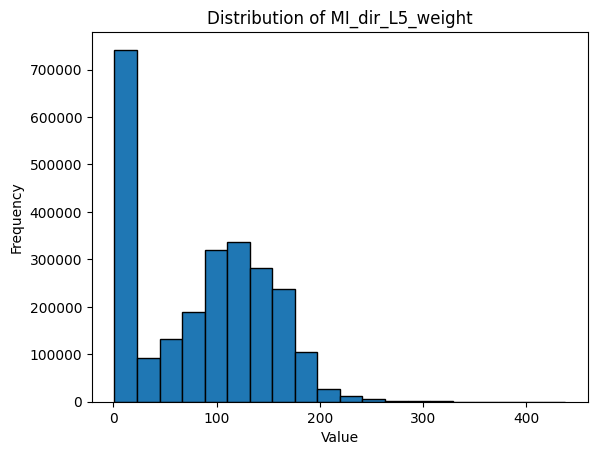

2


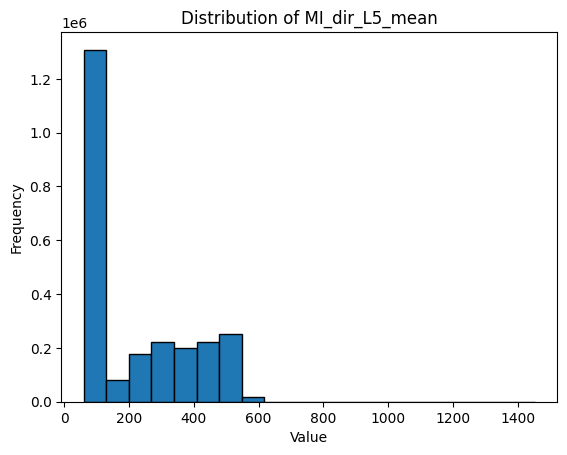

3


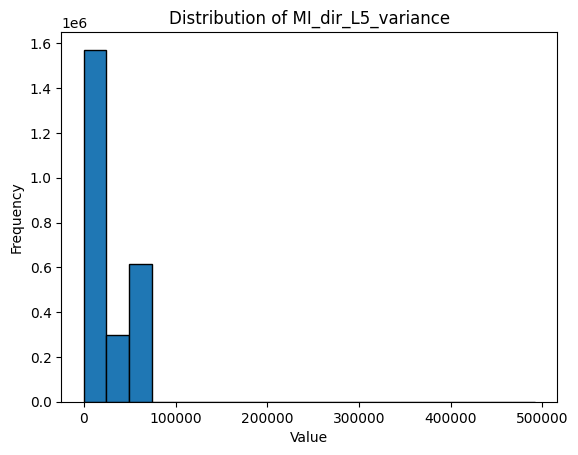

4


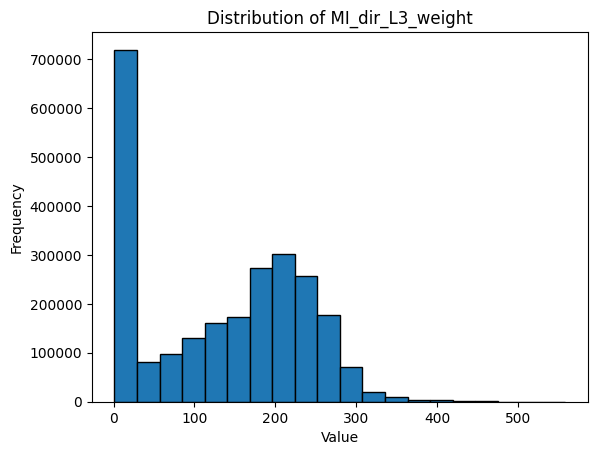

5


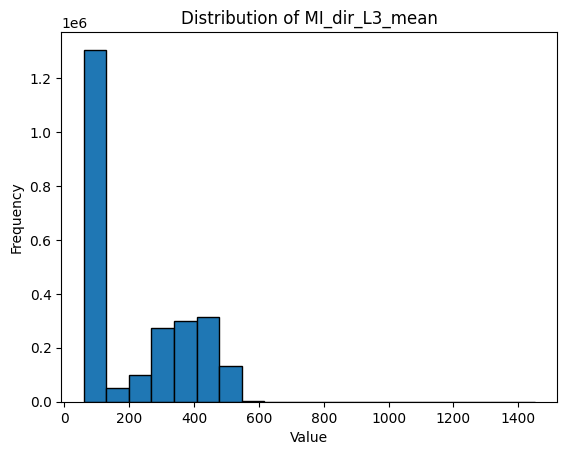

6


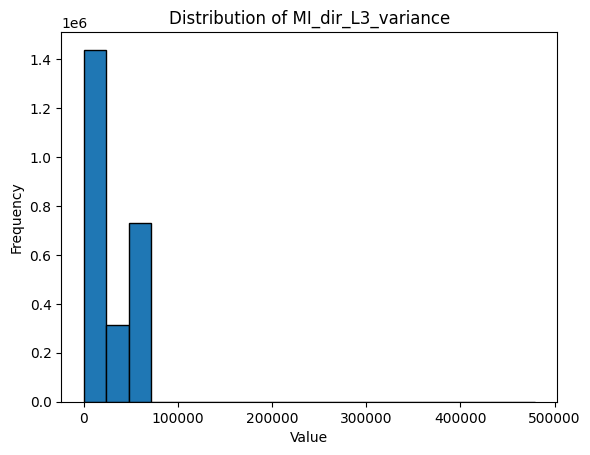

7


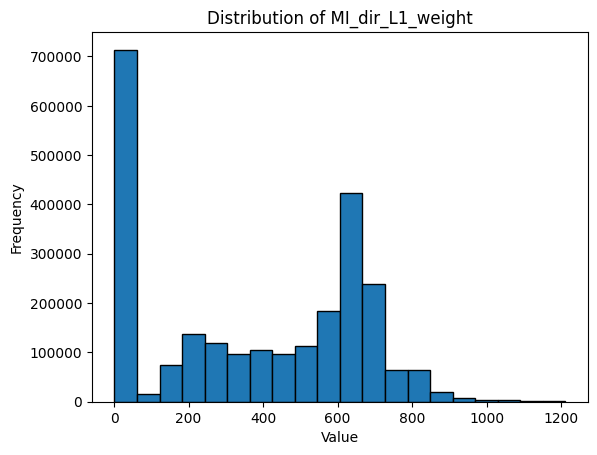

8


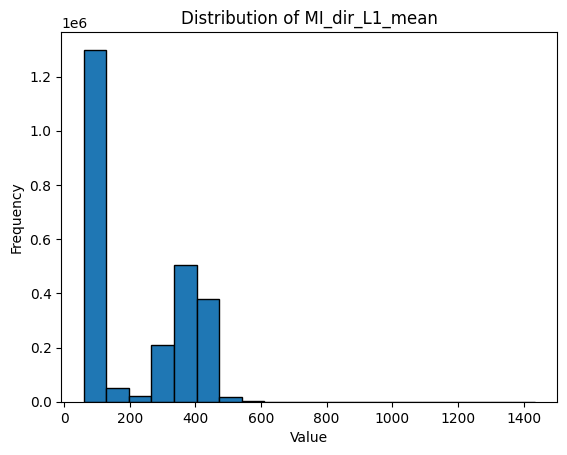

9


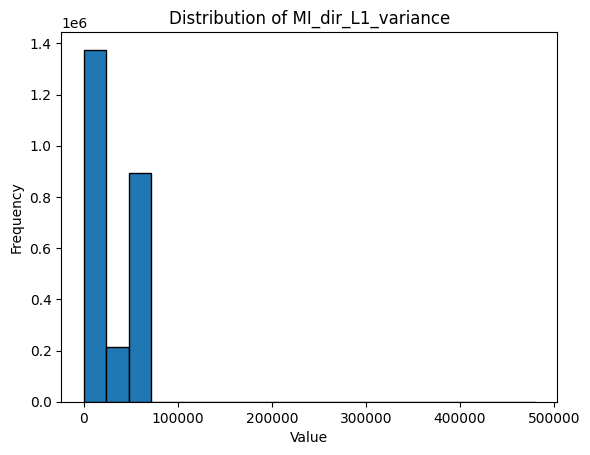

10


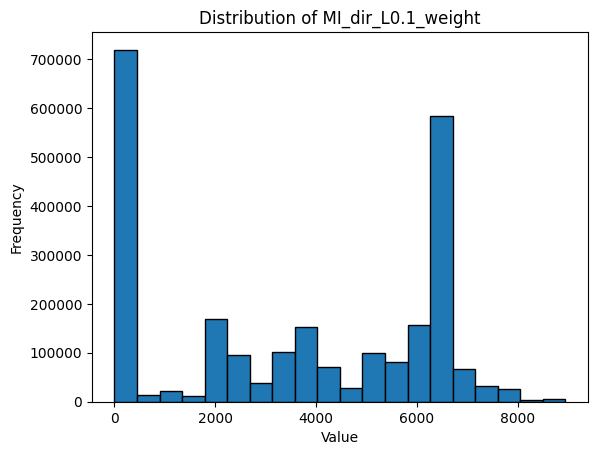

11


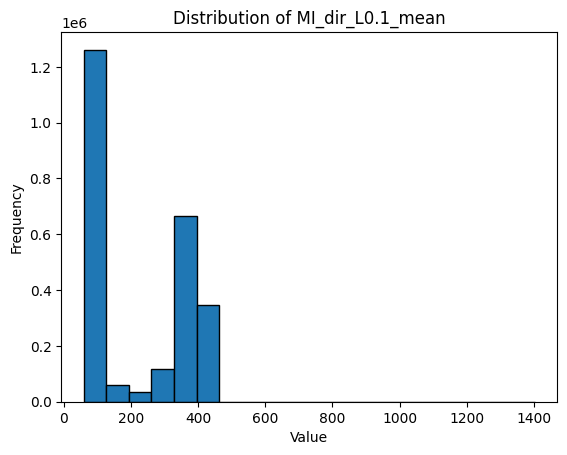

12


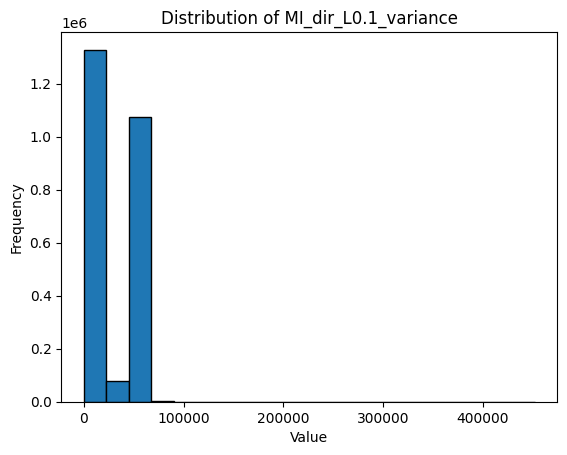

13


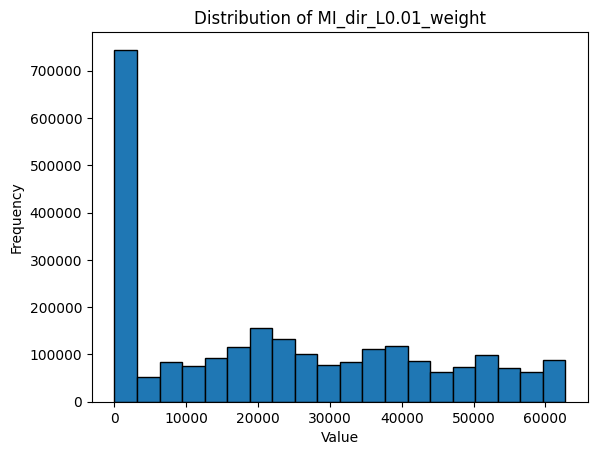

14


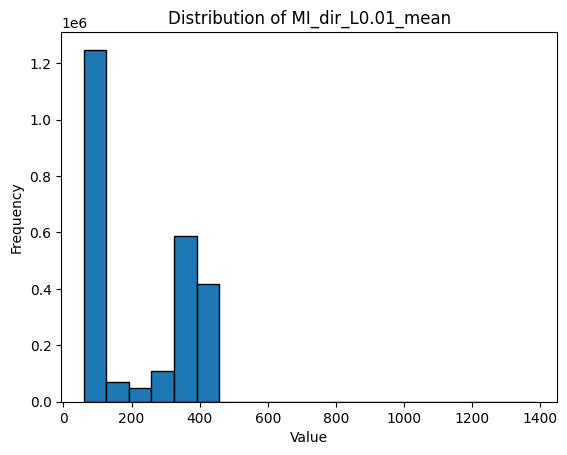

15


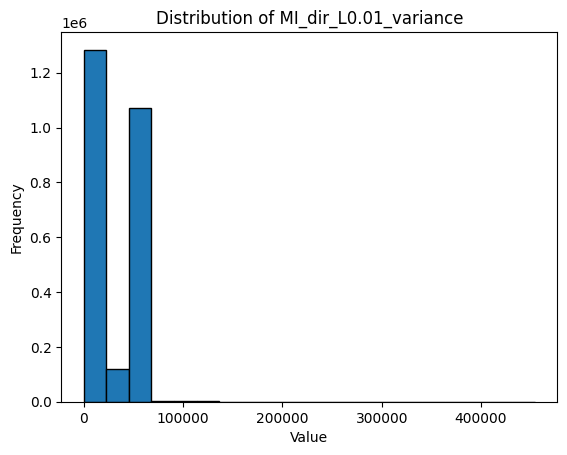

16


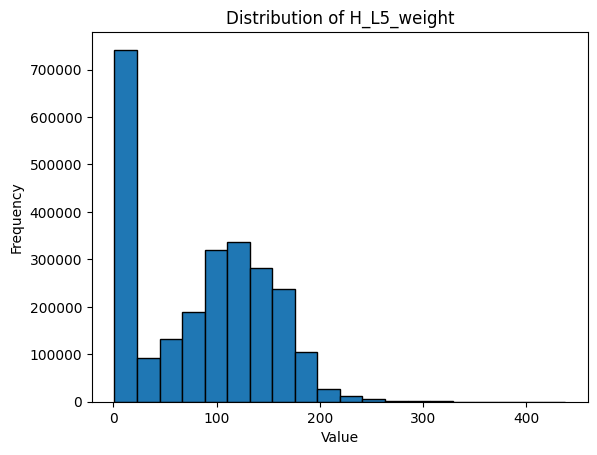

17


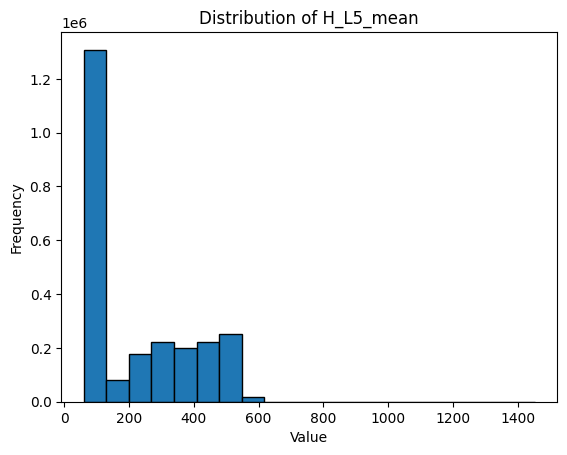

18


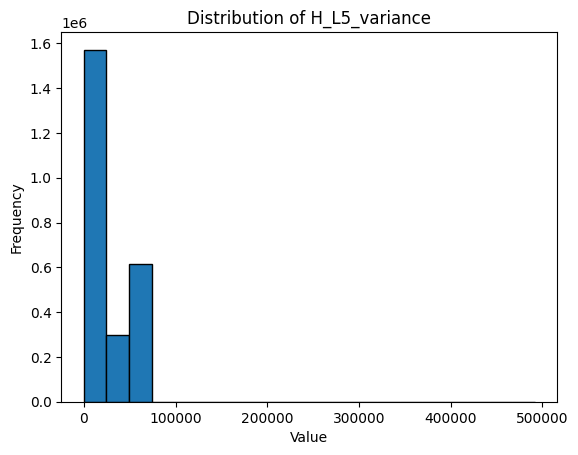

19


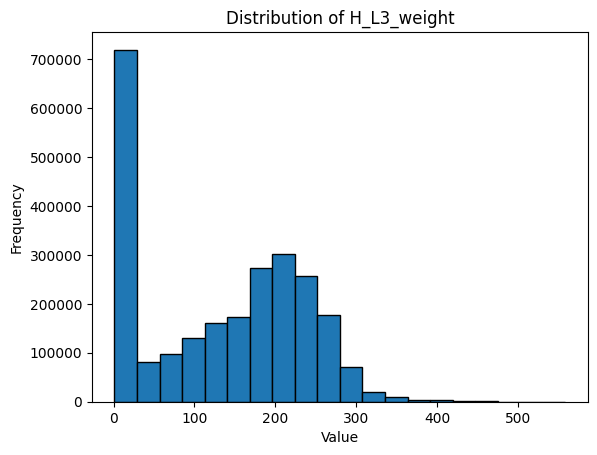

20


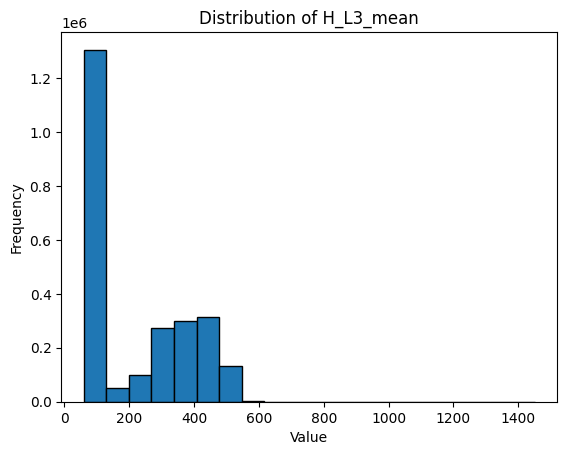

21


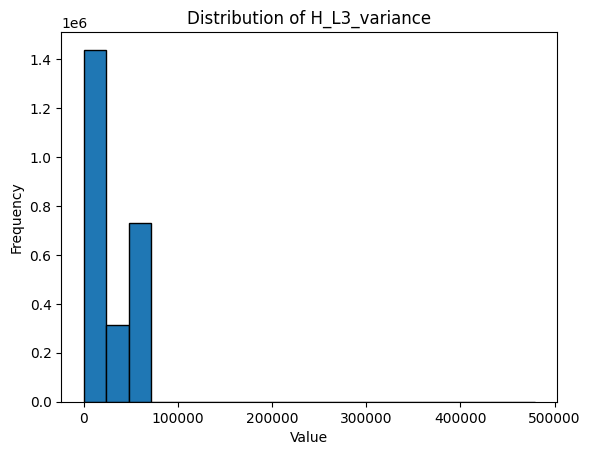

22


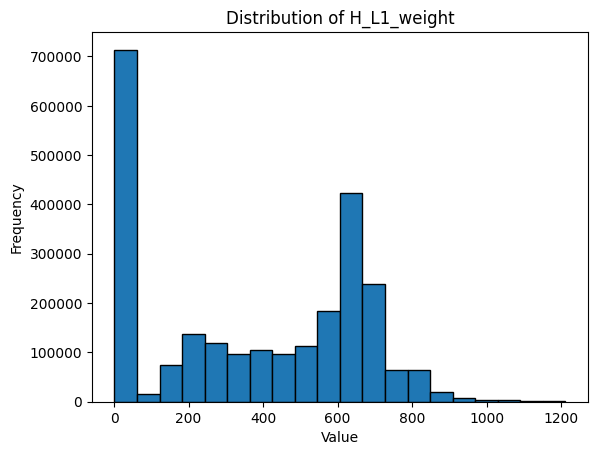

23


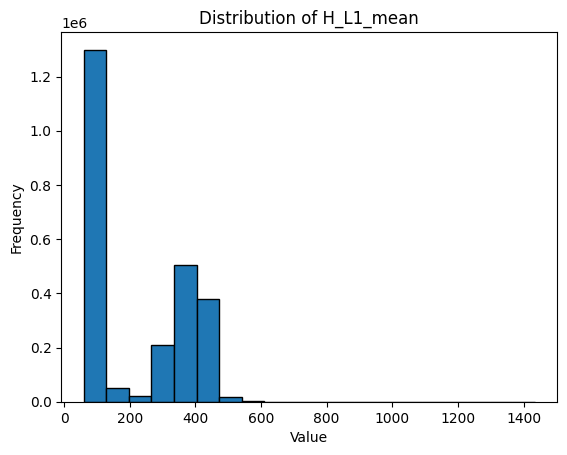

24


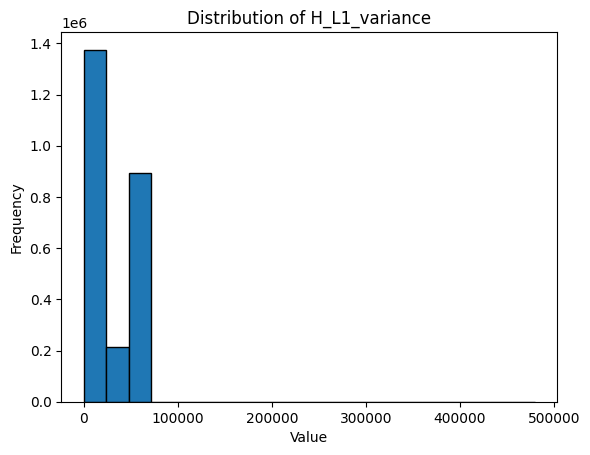

25


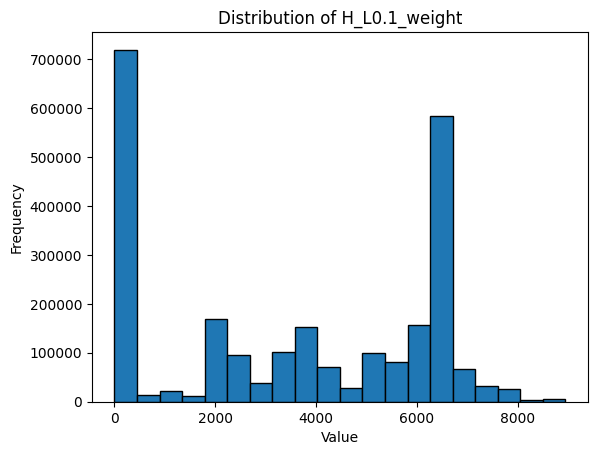

26


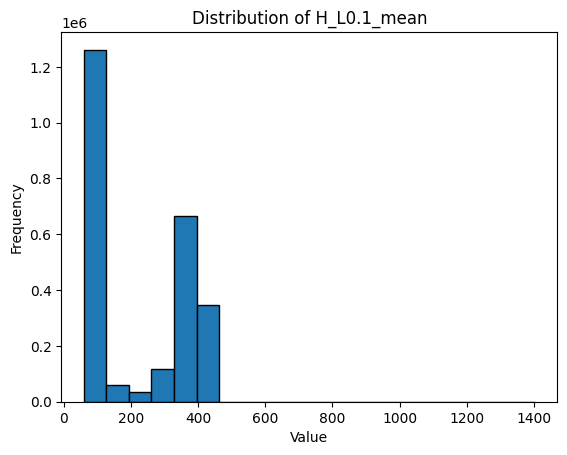

27


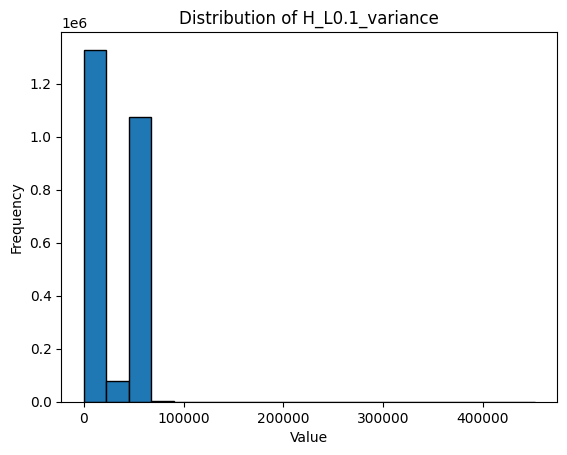

28


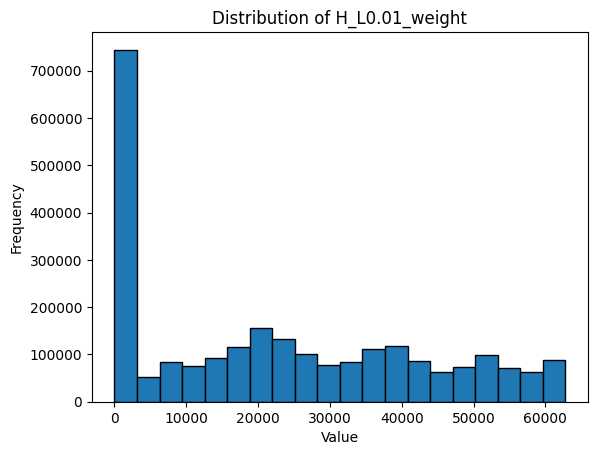

29


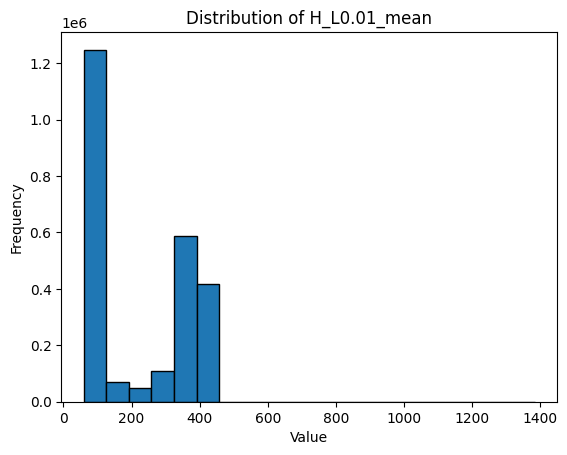

30


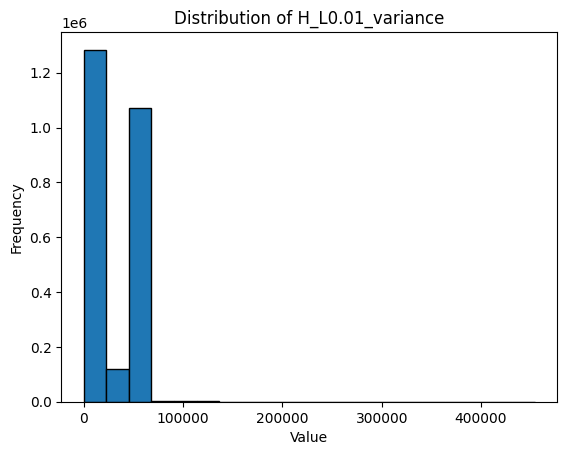

31


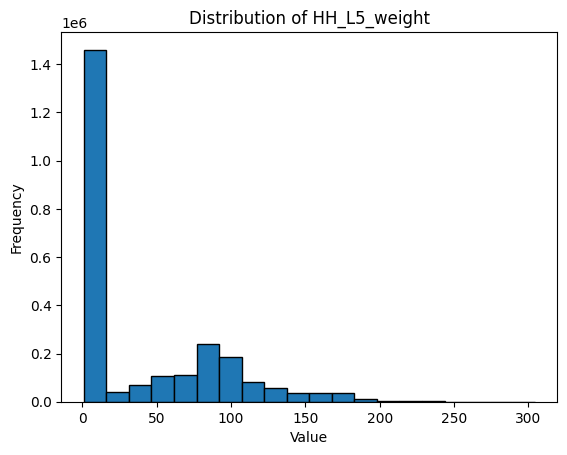

32


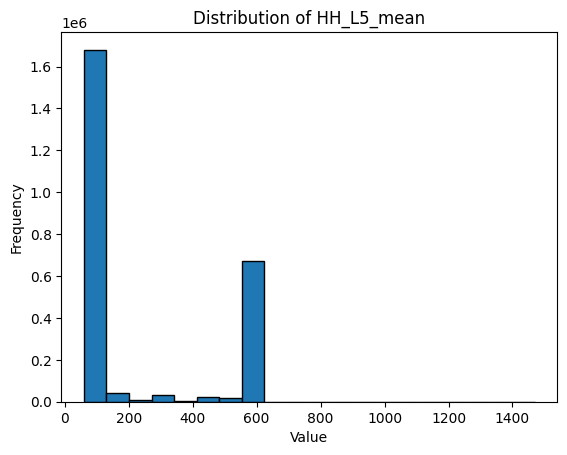

33


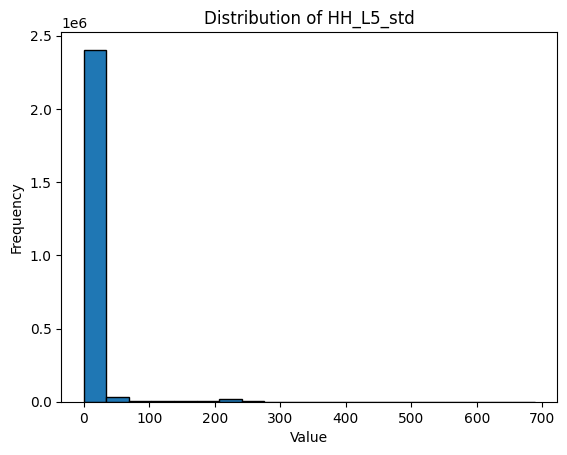

34


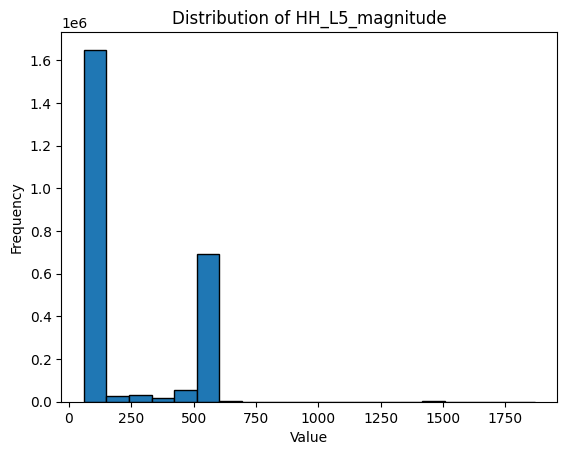

35


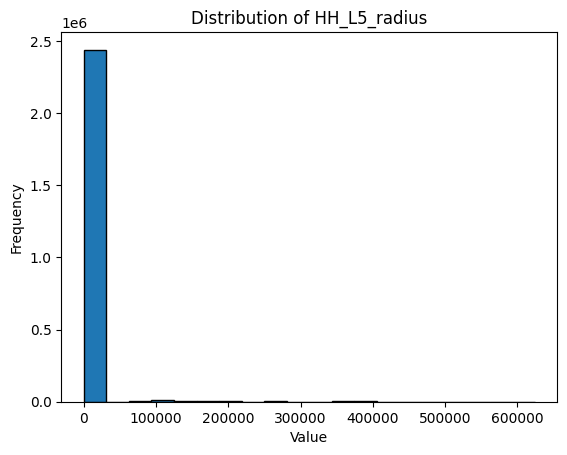

36


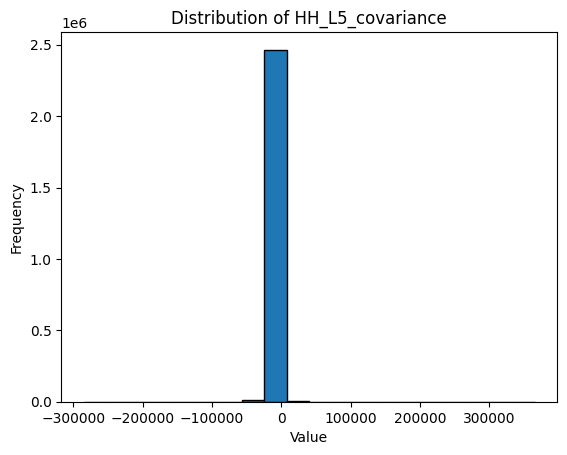

37


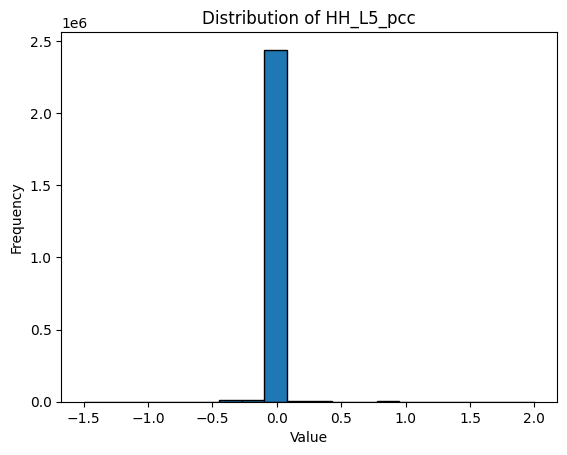

38


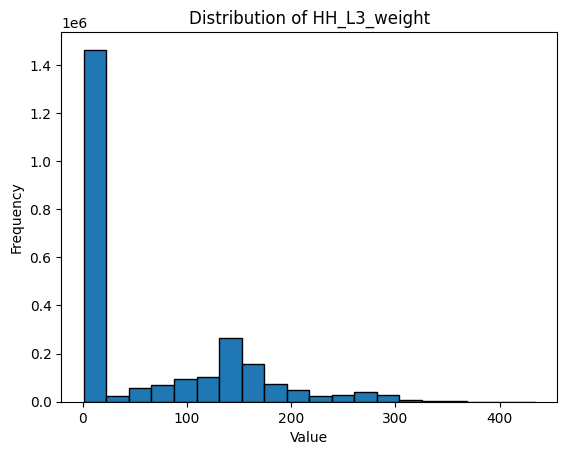

39


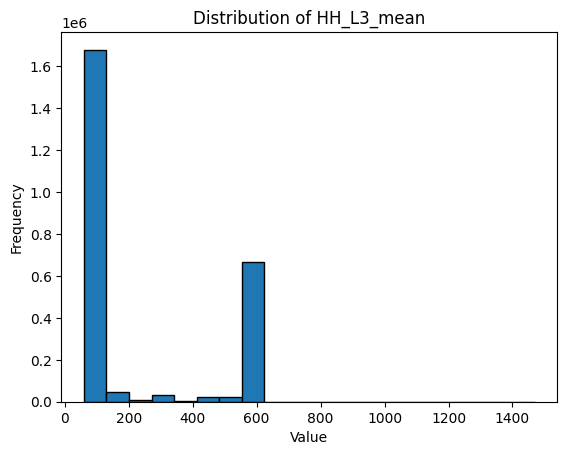

40


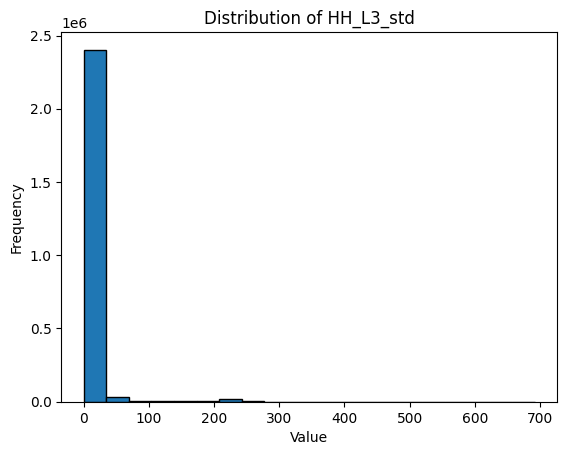

41


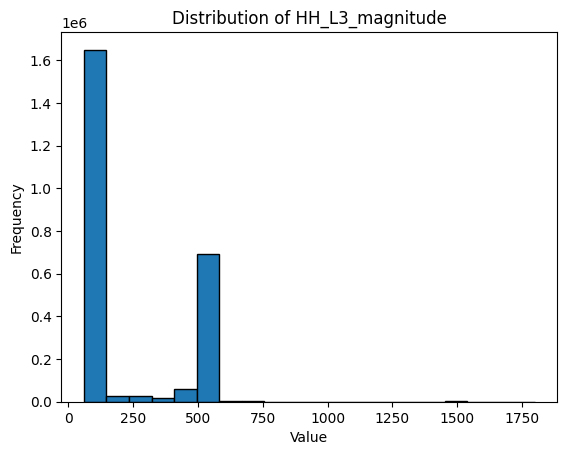

42


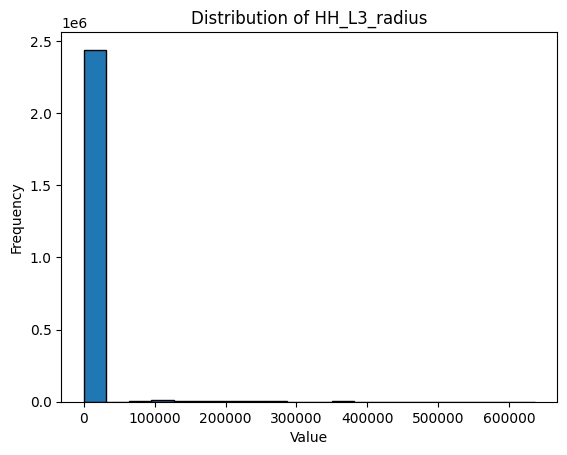

43


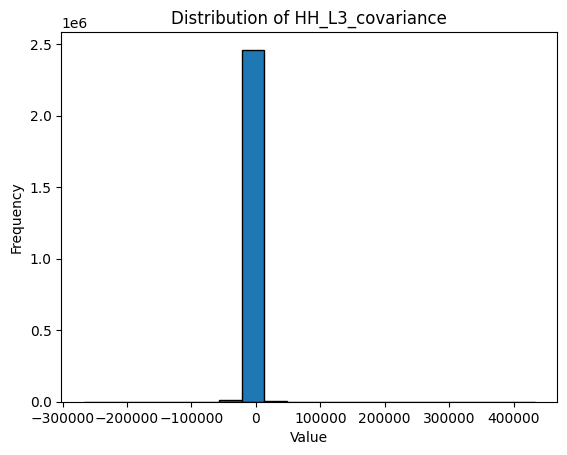

44


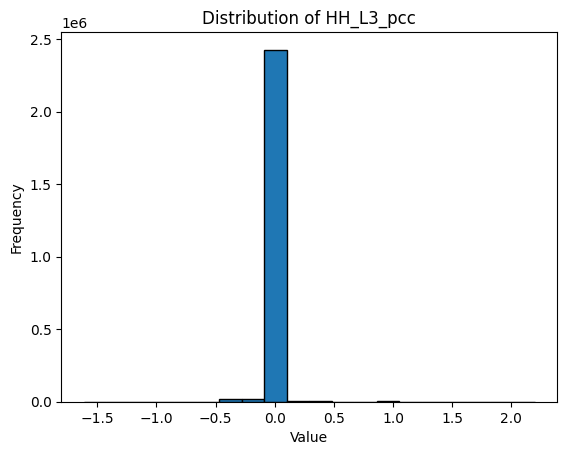

45


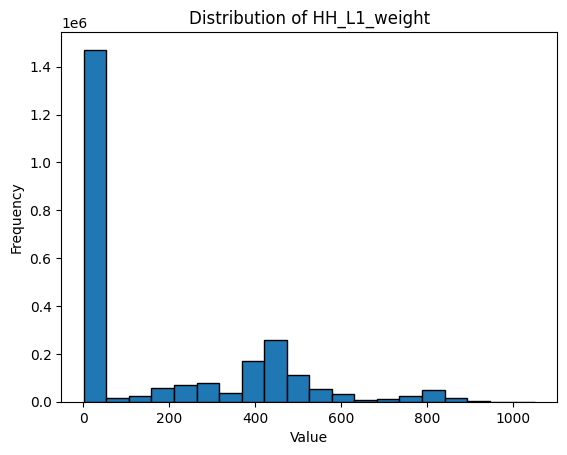

46


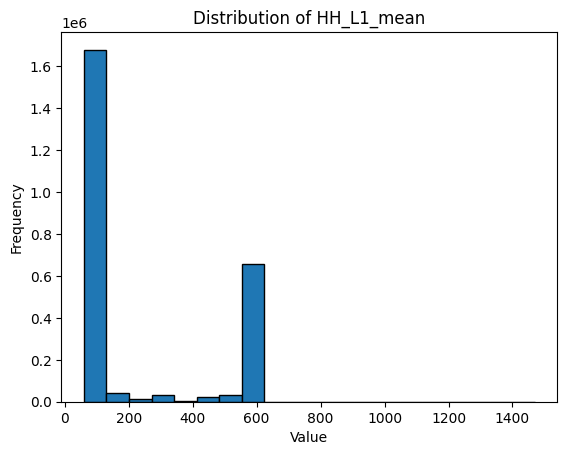

47


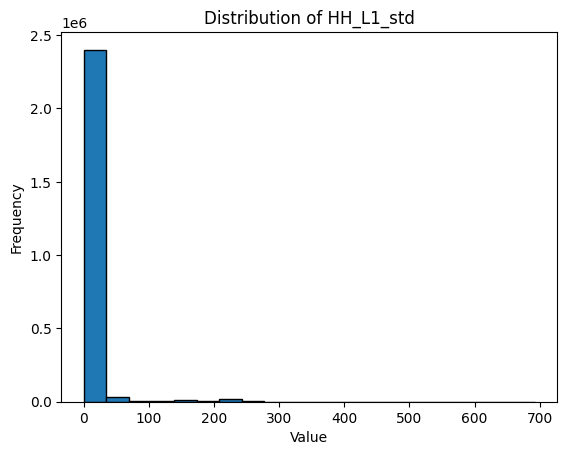

48


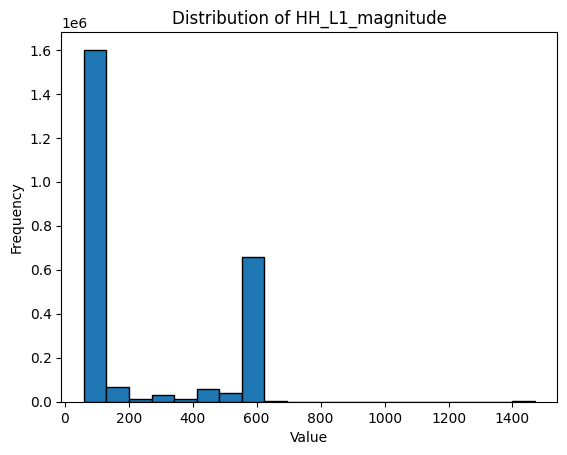

49


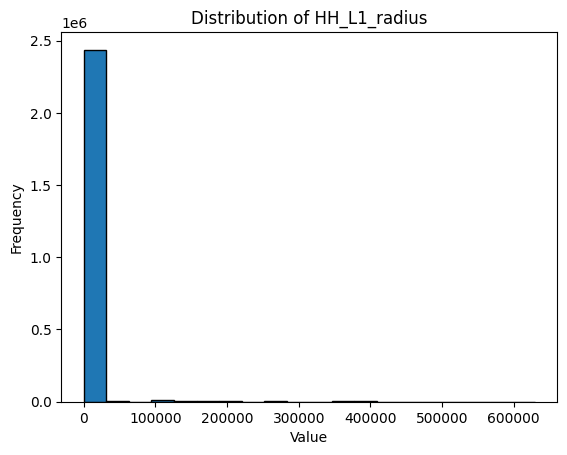

50


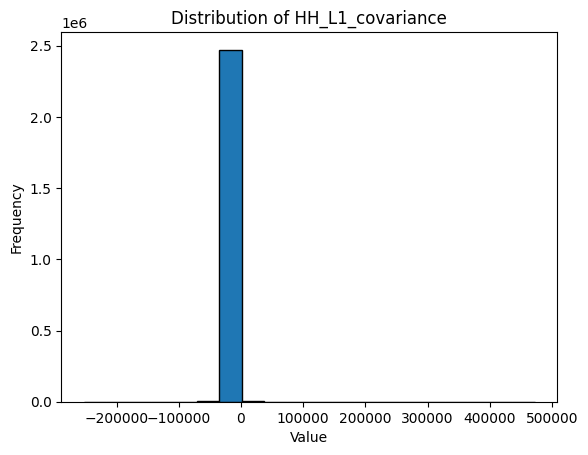

51


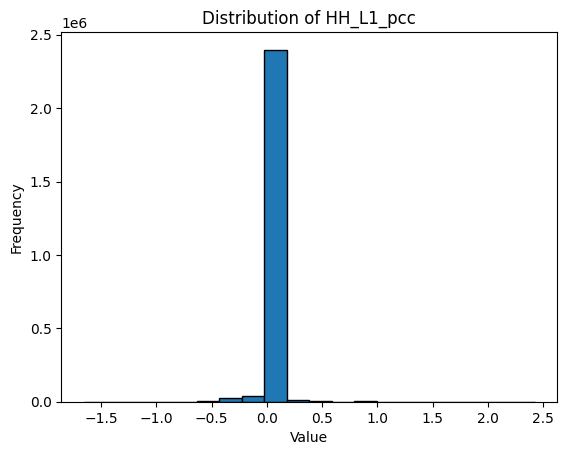

52


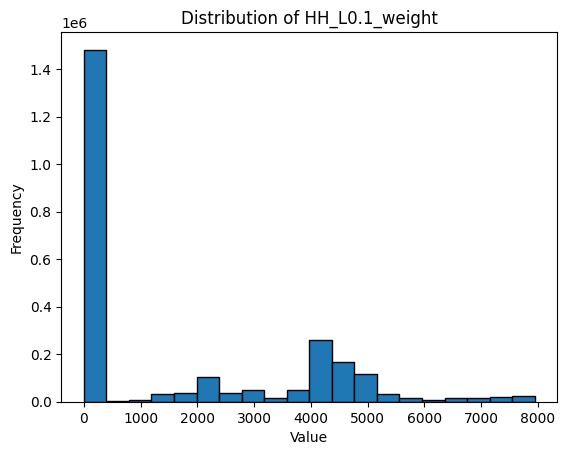

53


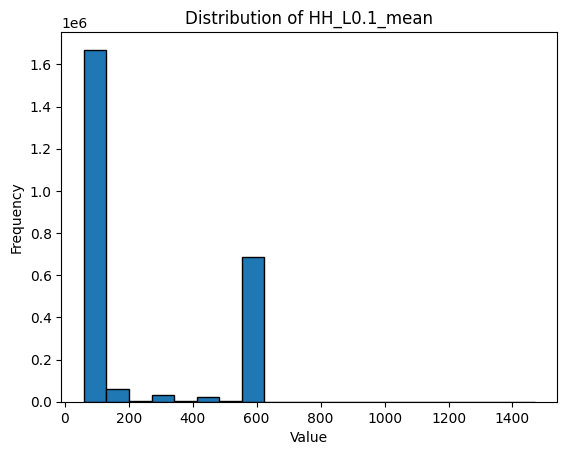

54


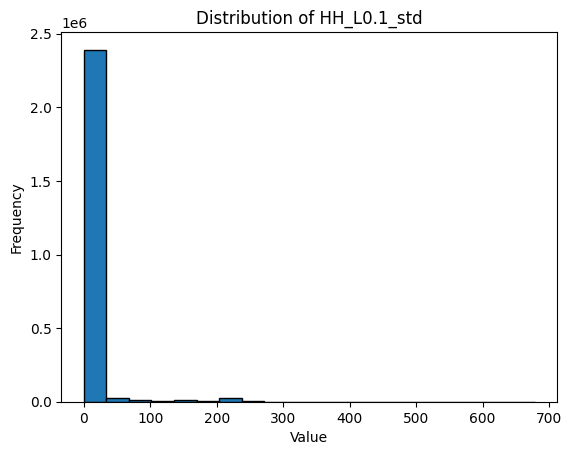

55


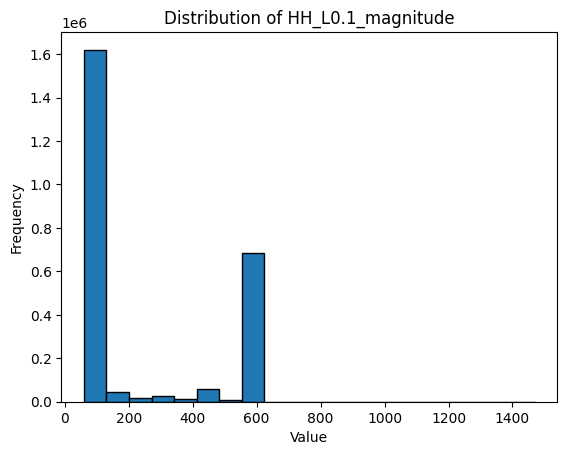

56


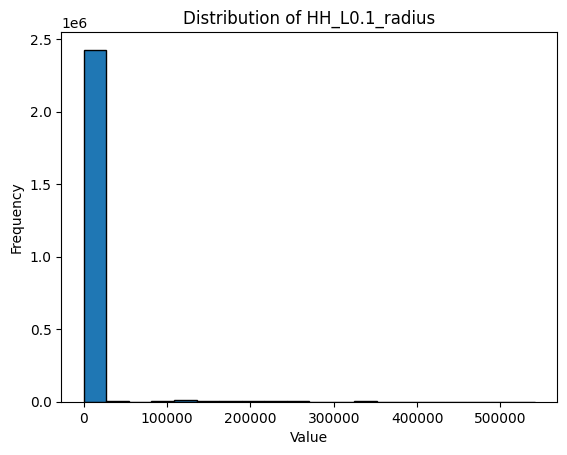

57


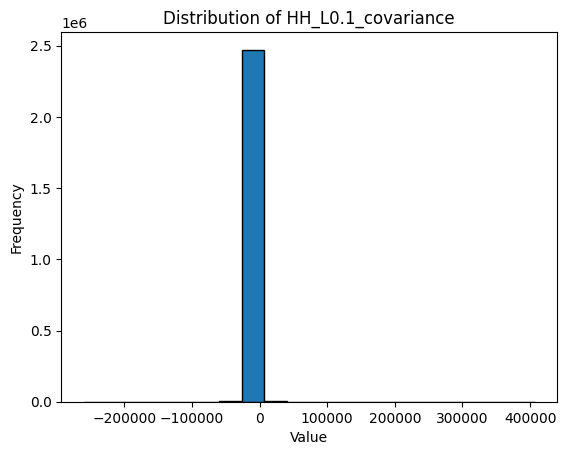

58


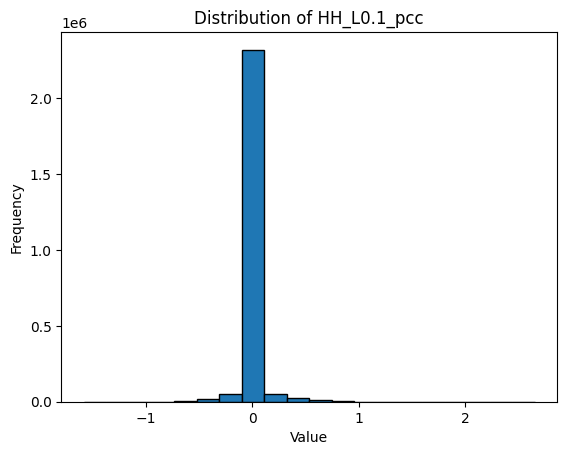

59


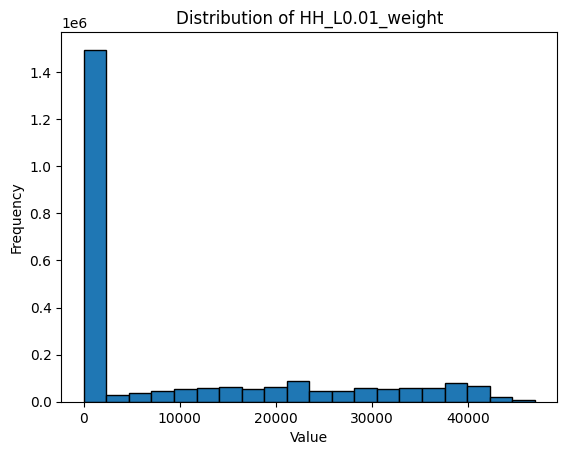

60


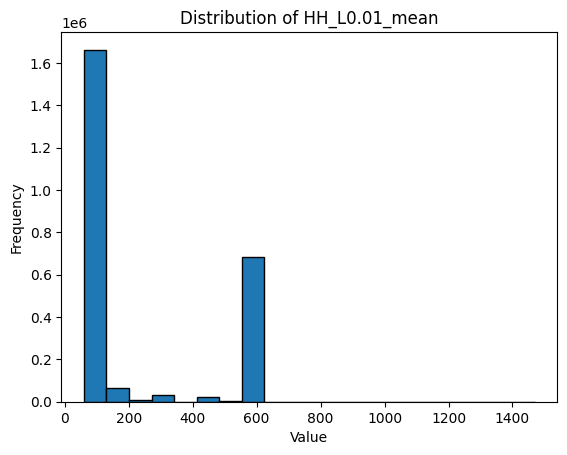

61


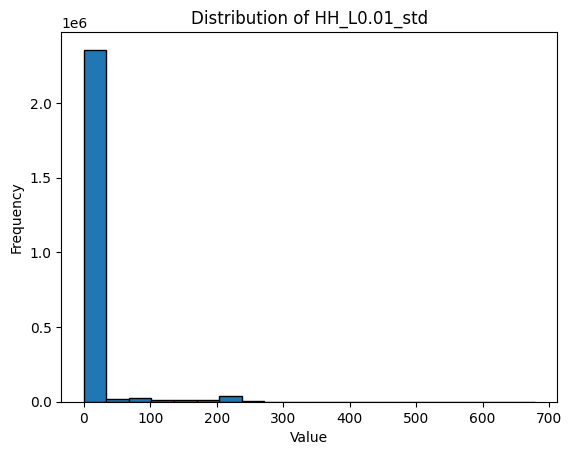

62


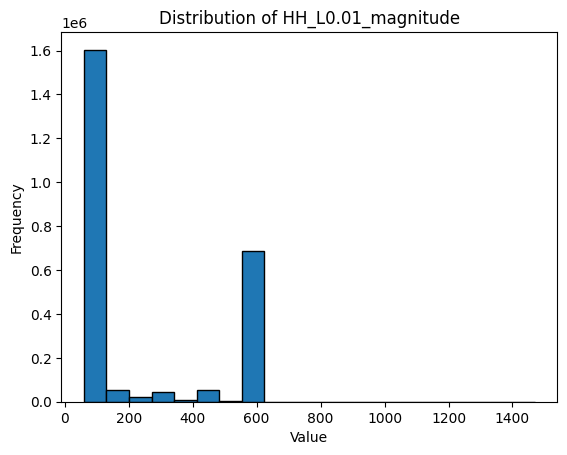

63


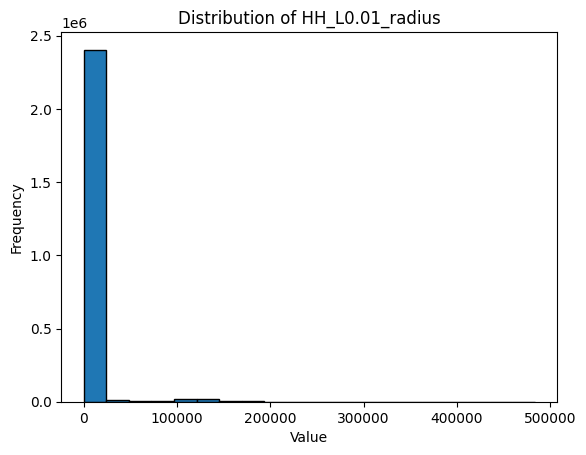

64


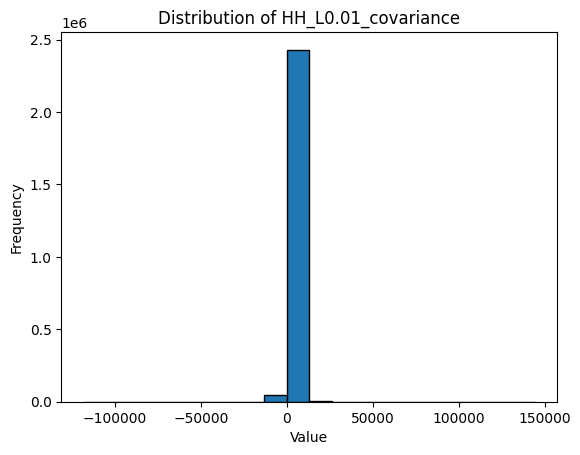

65


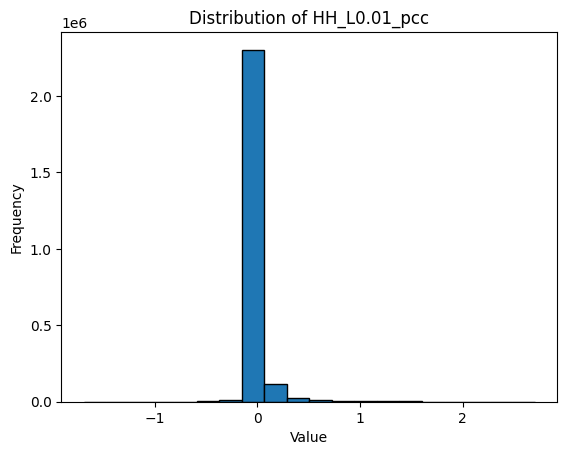

66


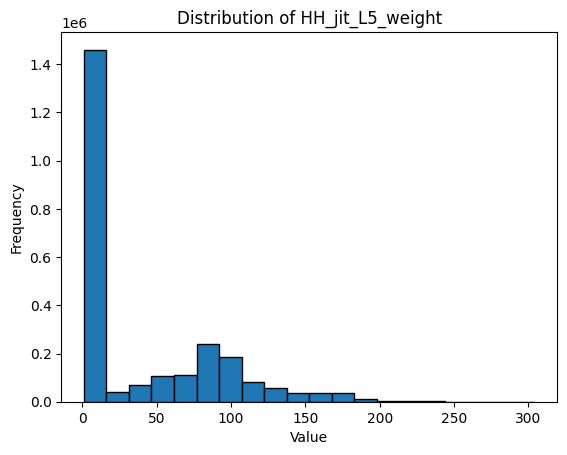

67


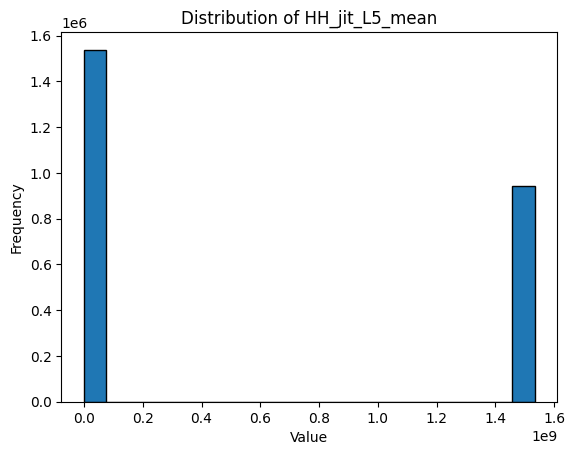

68


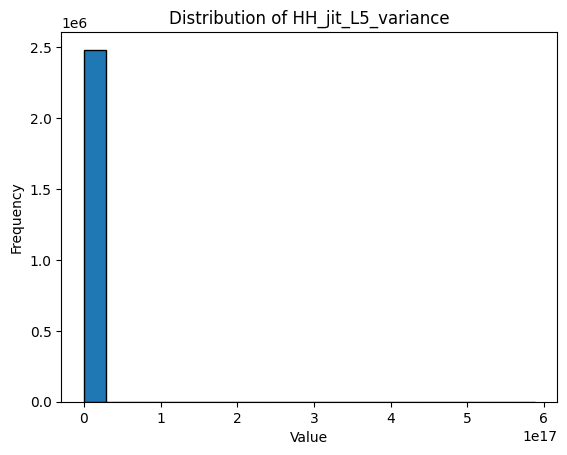

69


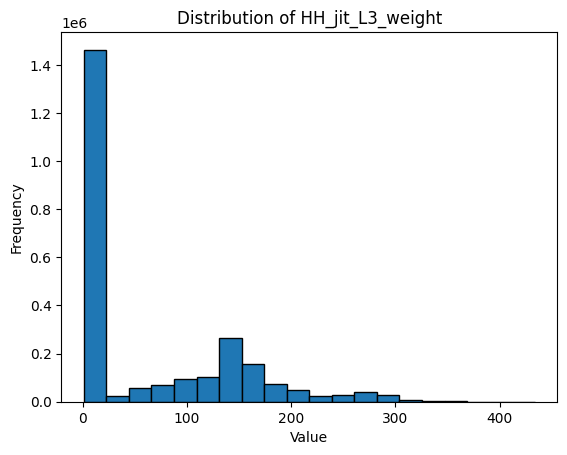

70


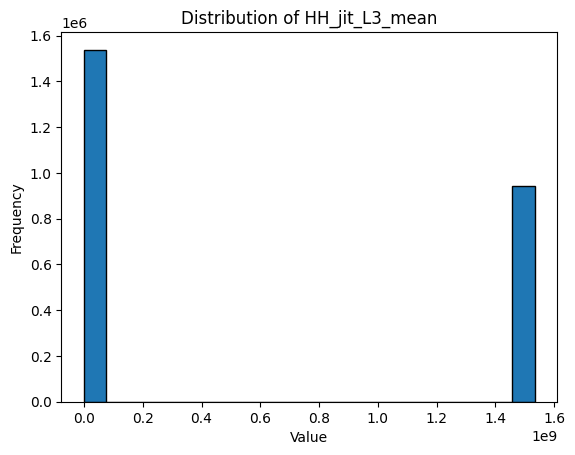

71


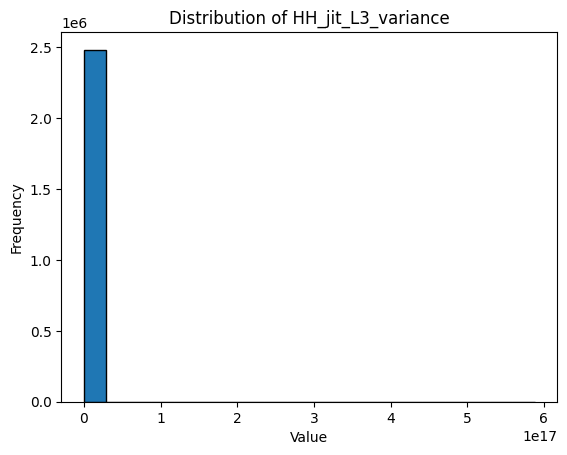

72


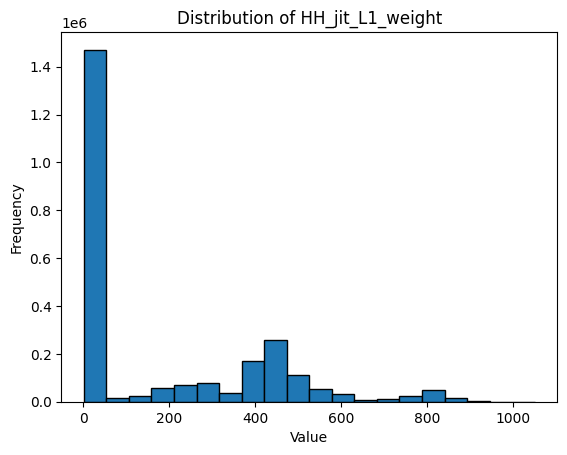

73


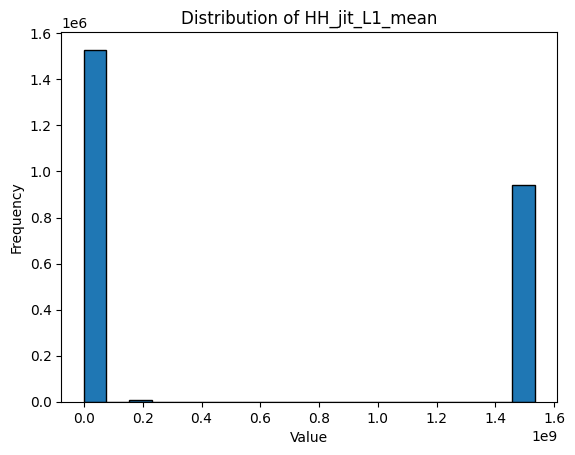

74


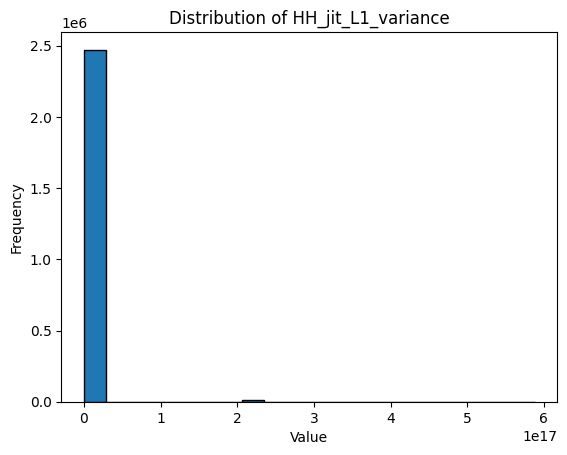

75


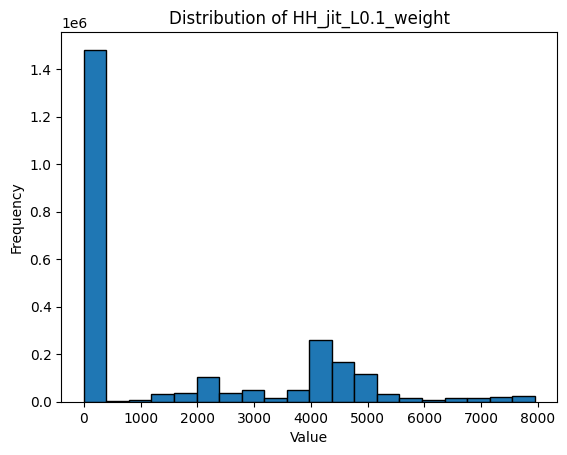

76


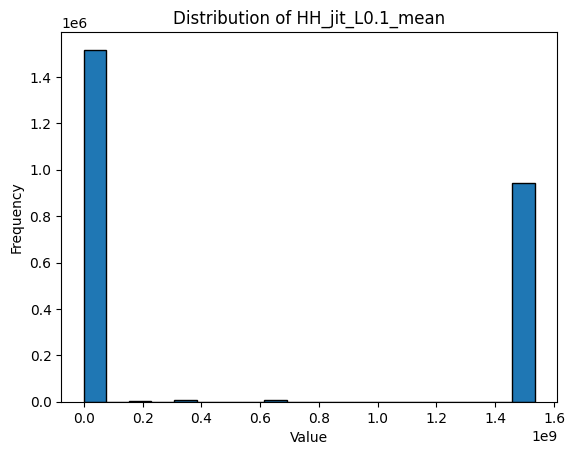

77


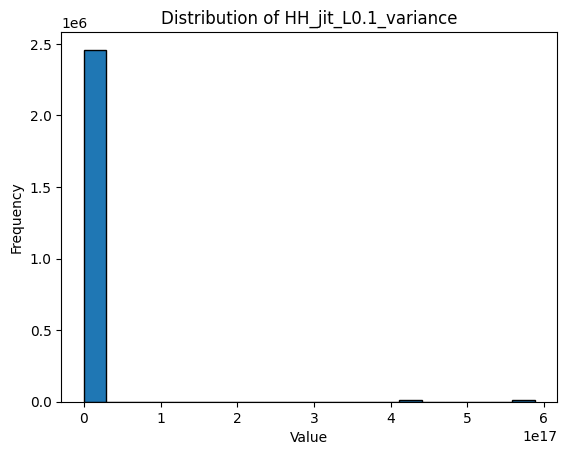

78


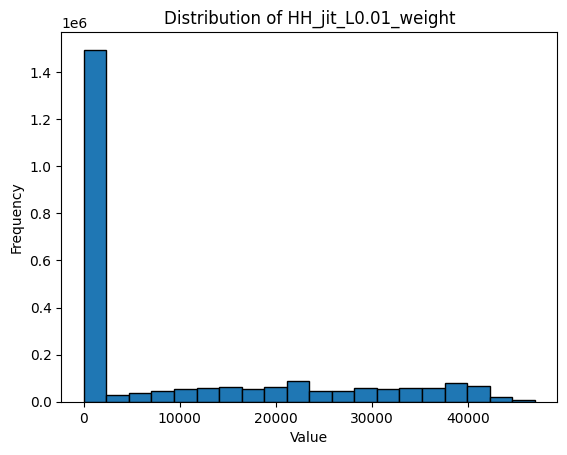

79


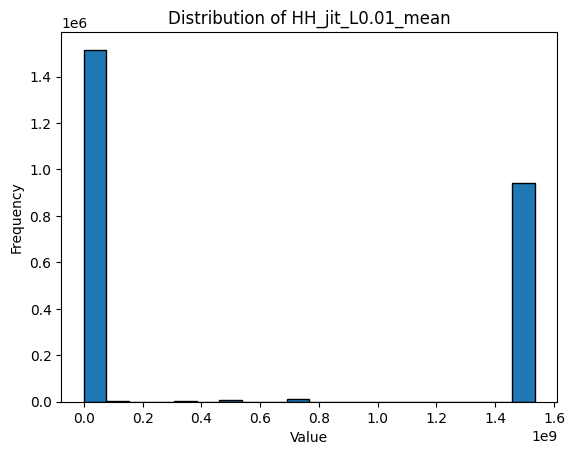

80


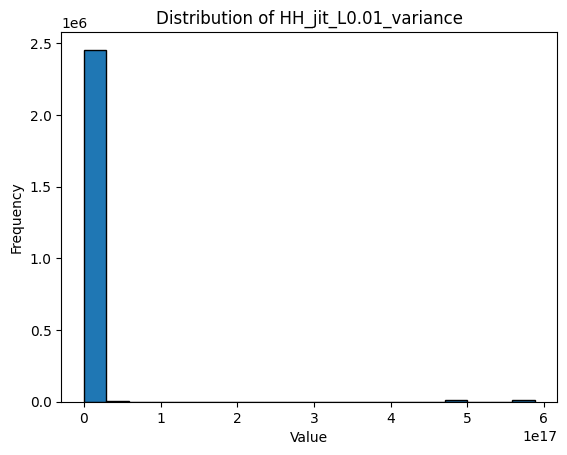

81


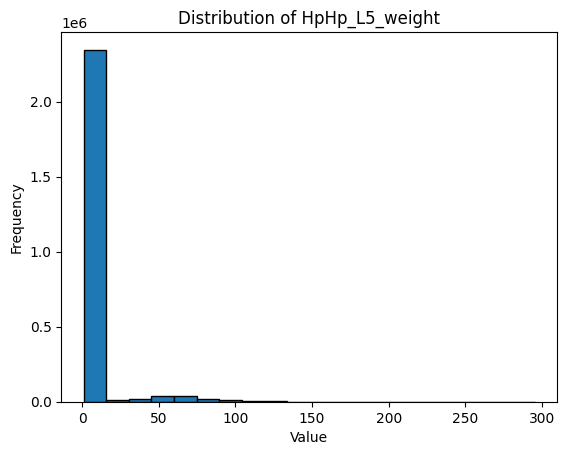

82


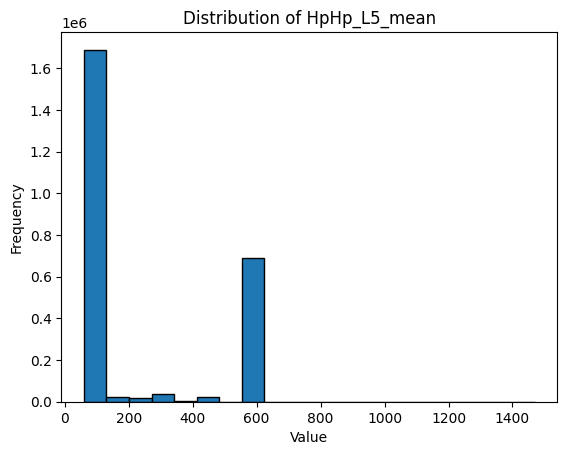

83


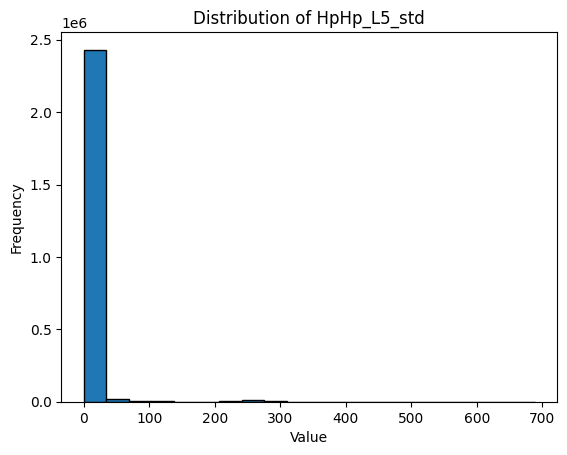

84


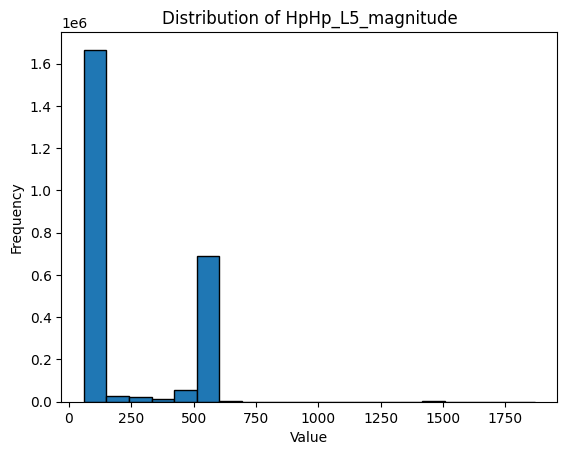

85


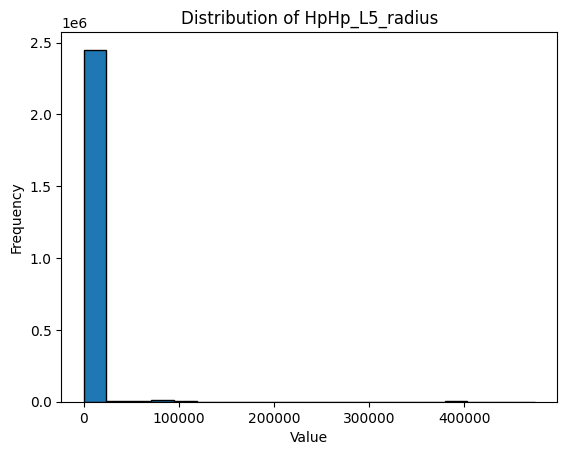

86


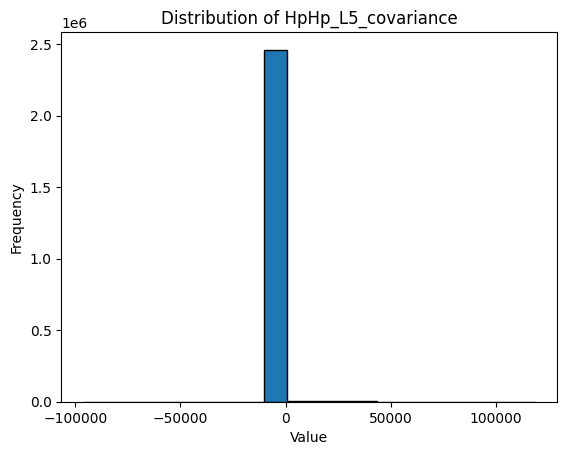

87


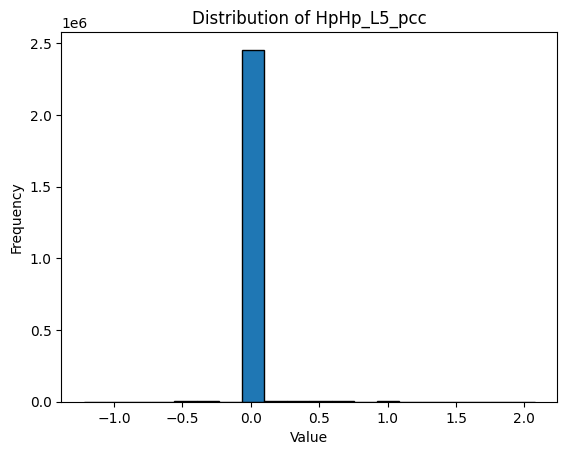

88


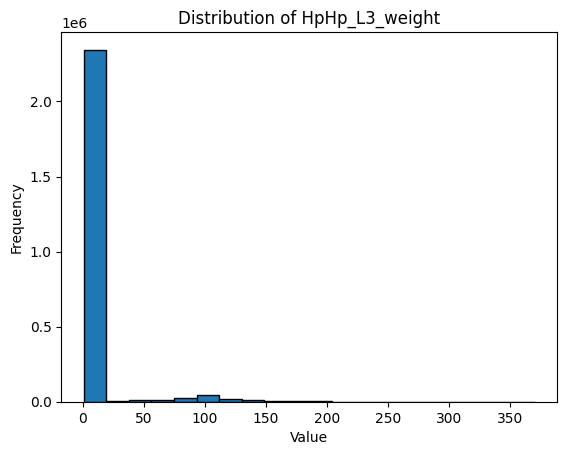

89


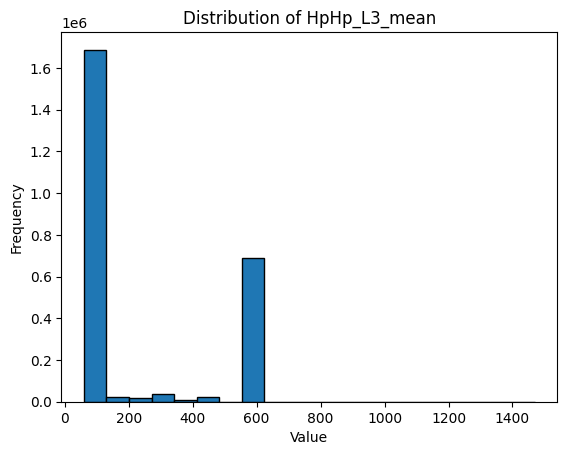

90


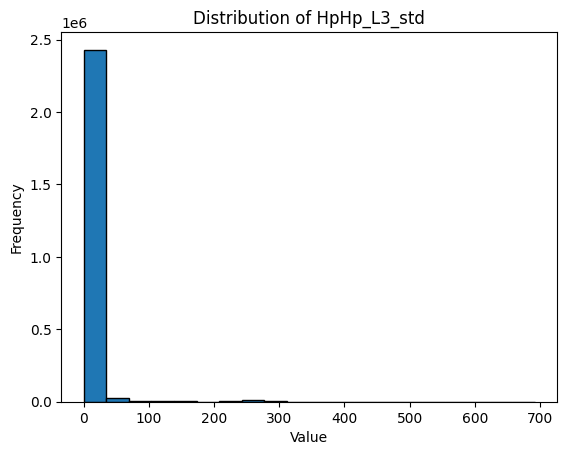

91


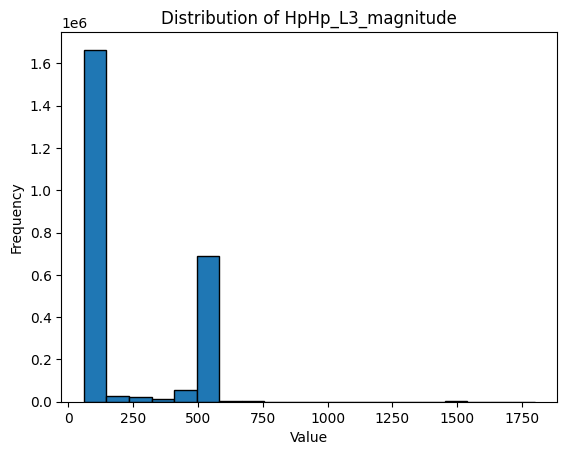

92


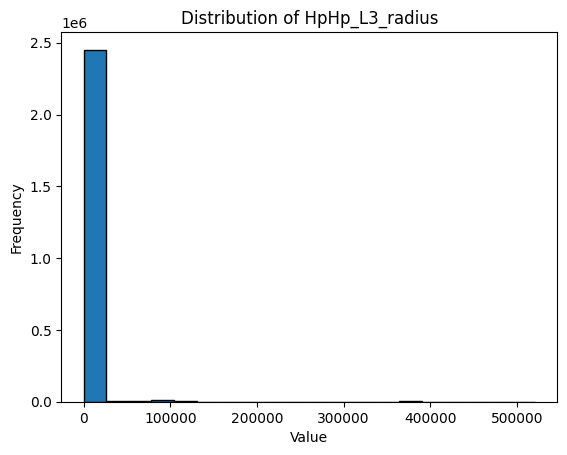

93


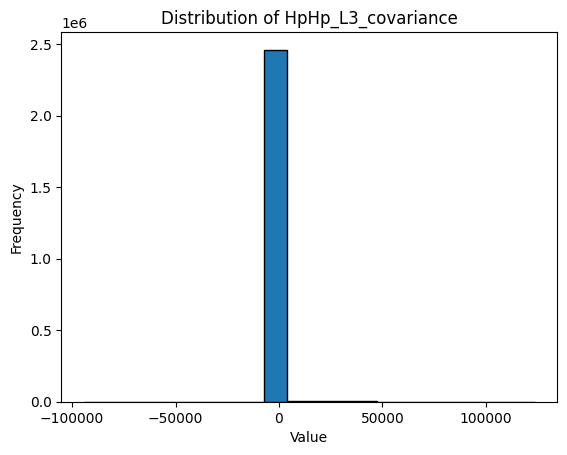

94


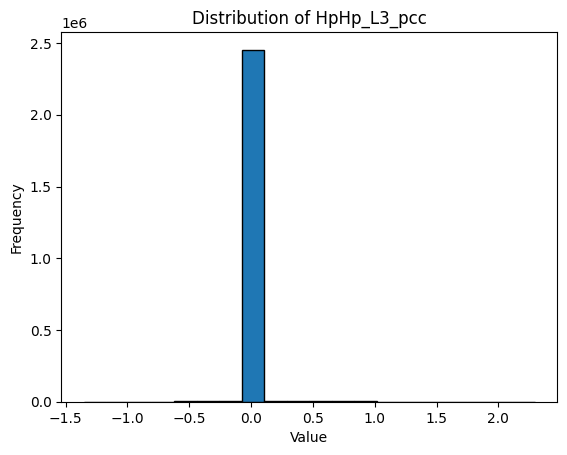

95


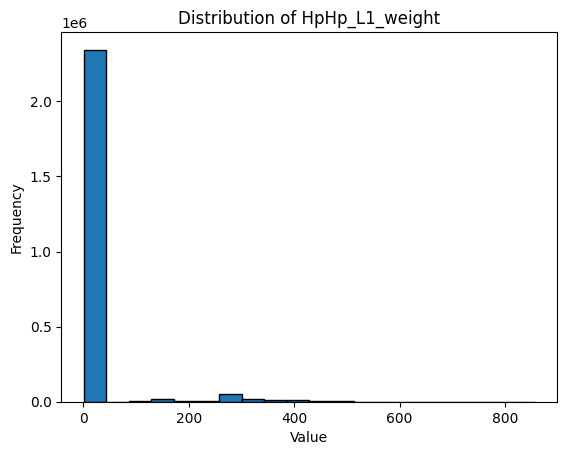

96


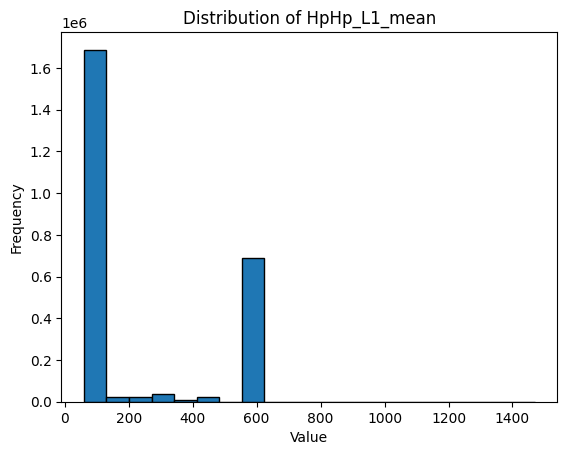

97


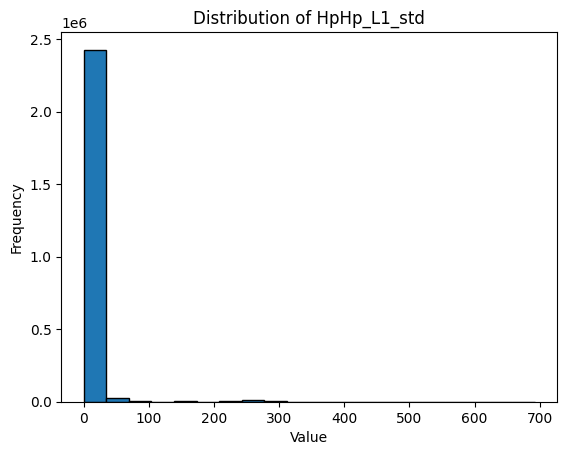

98


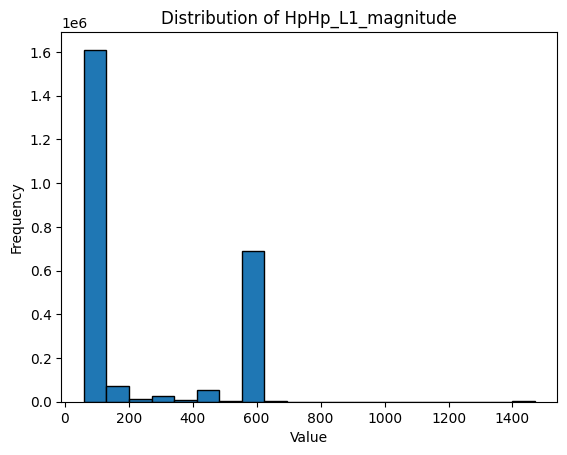

99


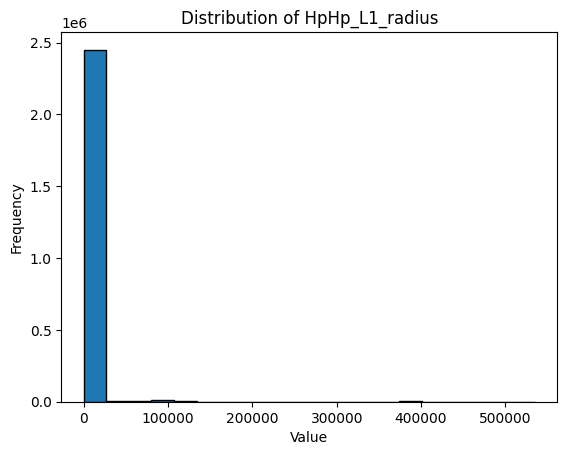

100


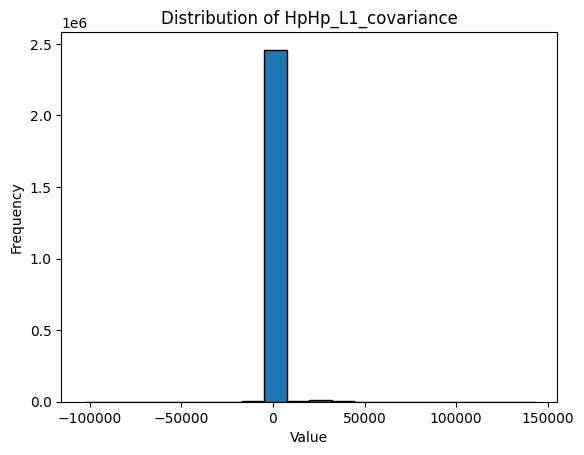

101


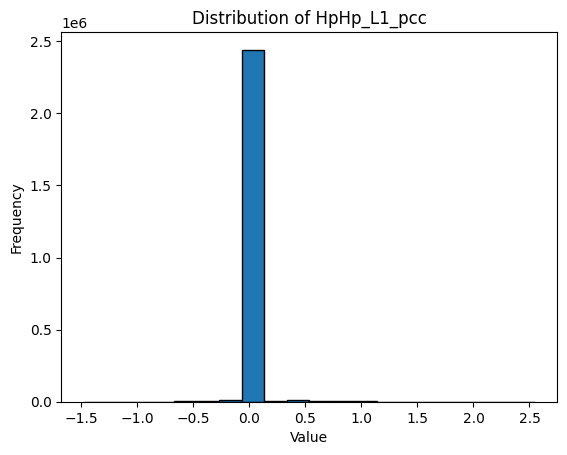

102


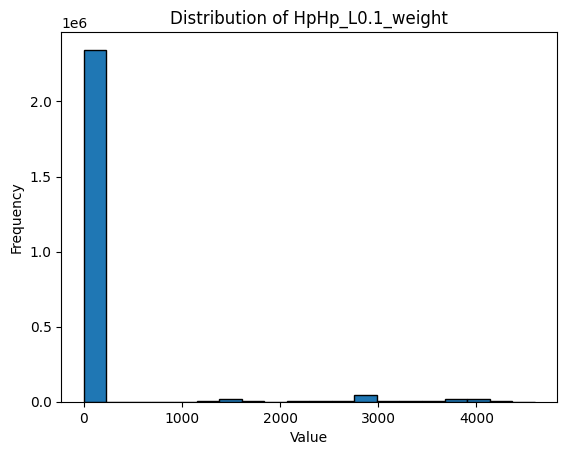

103


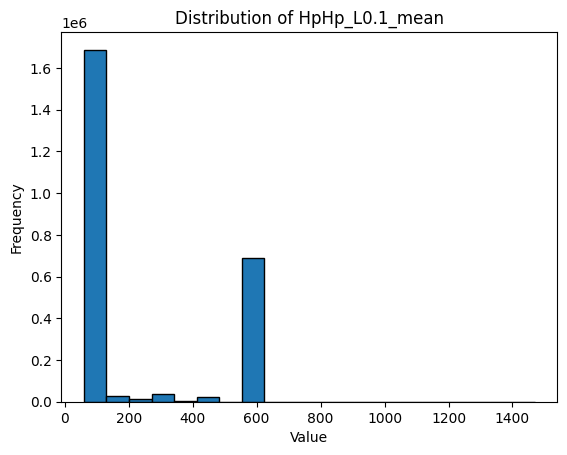

104


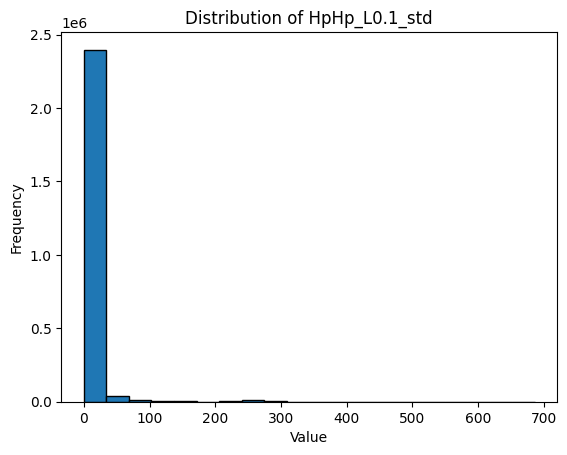

105


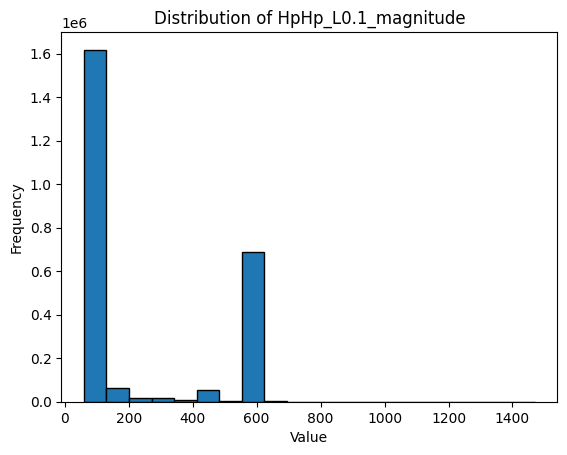

106


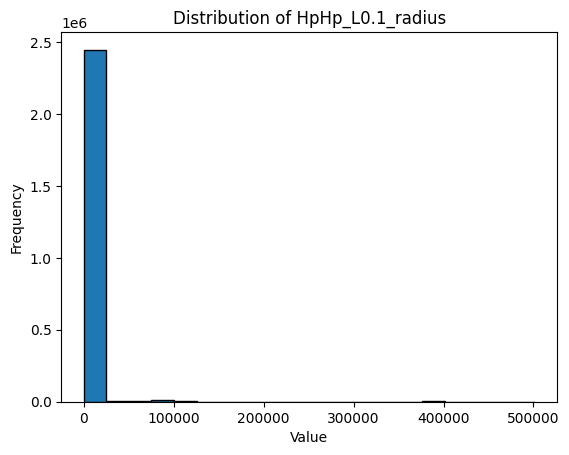

107


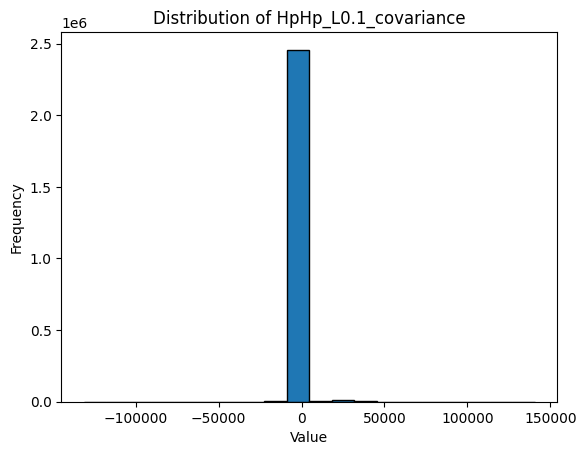

108


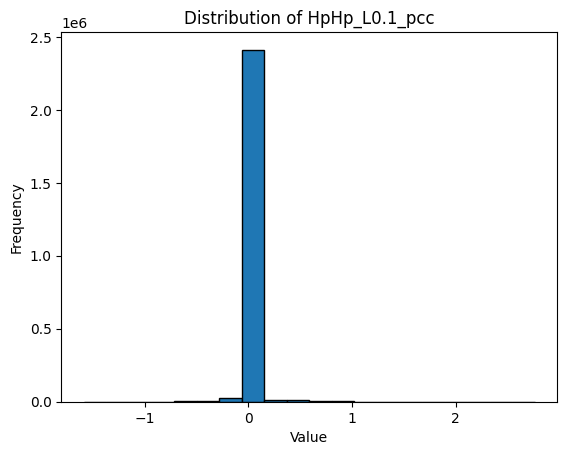

109


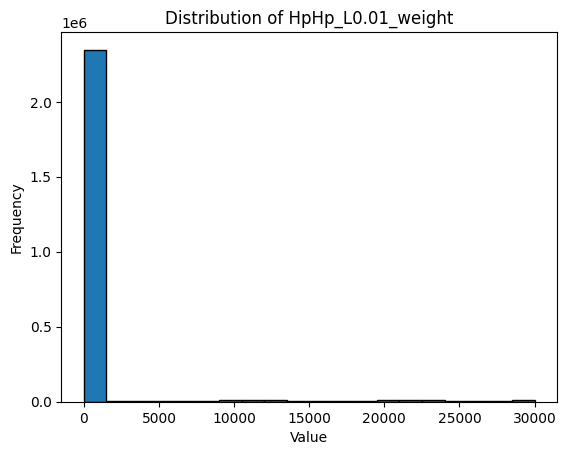

110


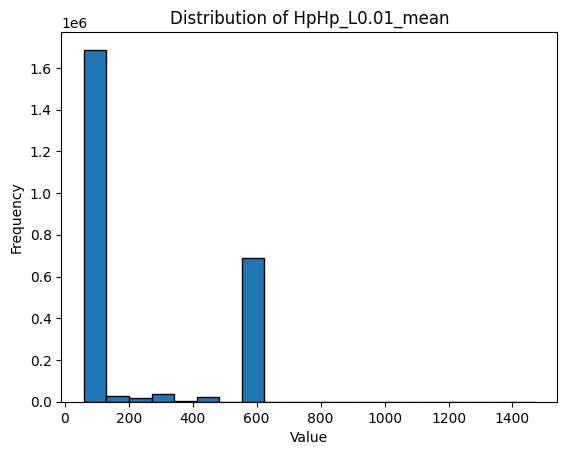

111


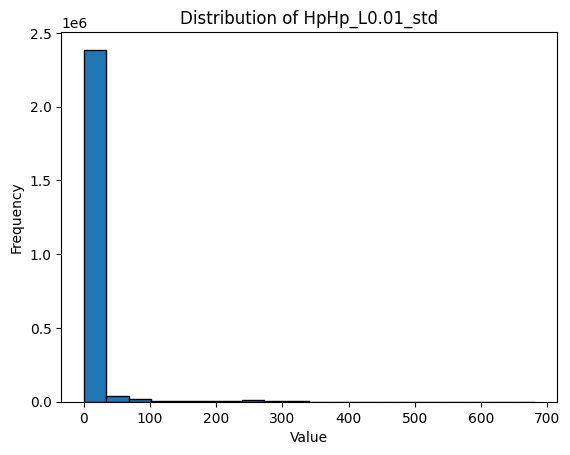

112


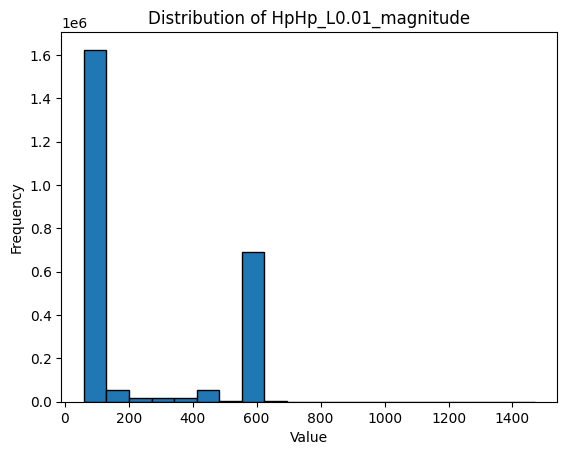

113


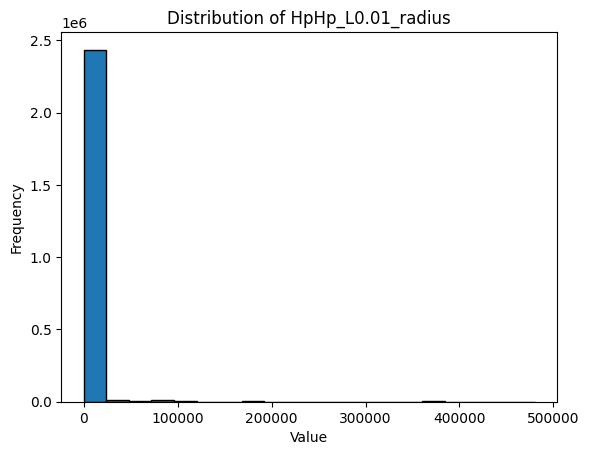

114


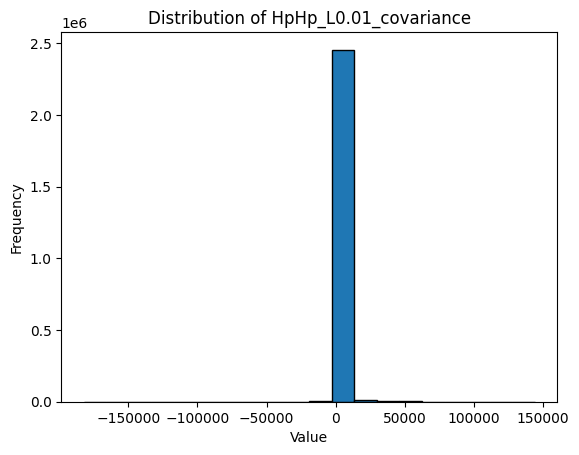

115


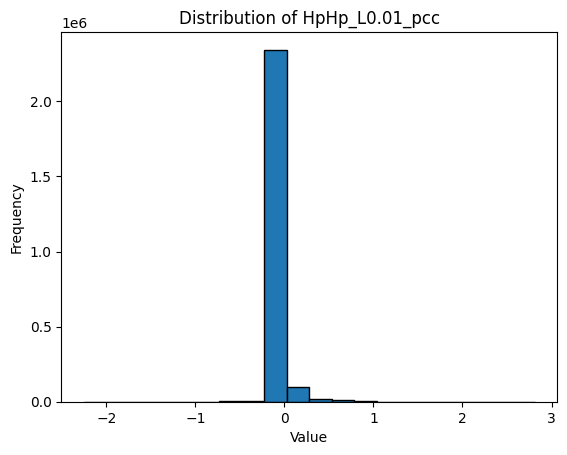

In [17]:
i = 1
for col in cols[:-2]:
    distribution(allSamples, col, 20, i)
    i = i+1

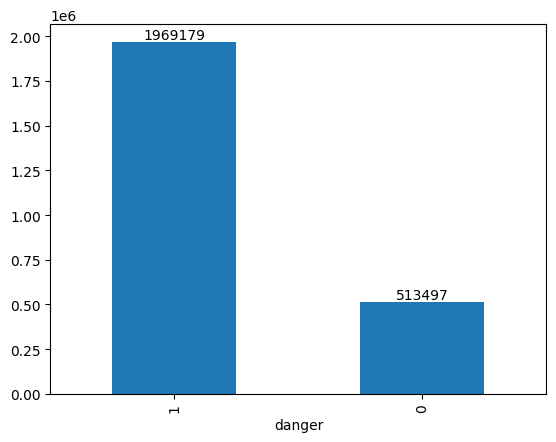

In [18]:
ax = allSamples['danger'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(str(height), (x + width/2, y + height + 0.1), ha='center', va='bottom')
plt.show()

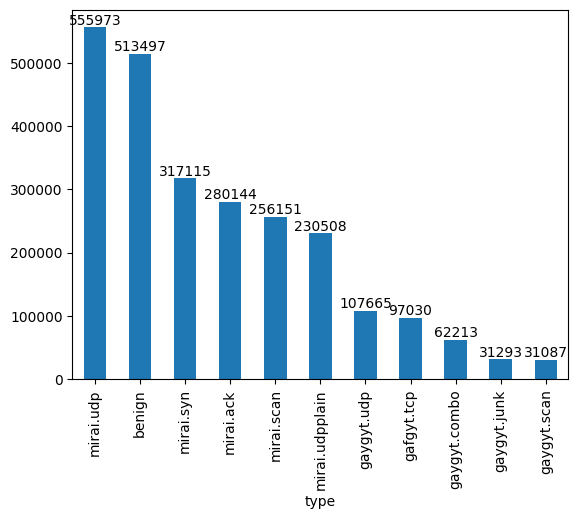

In [19]:
ax = allSamples['type'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(str(height), (x + width/2, y + height + 0.1), ha='center', va='bottom')
plt.show()

In [20]:
dangerDF = allSamples.drop('type', axis=1)
typeDP = allSamples.drop('danger', axis=1)

## Danger dataframe

In [21]:
BenignDF = dangerDF[dangerDF.danger==0]
DangerDF = dangerDF[dangerDF.danger==1]

In [22]:
DangerDF = DangerDF.sample(500000)

In [23]:
DangerDF

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,danger
590427,96.704198,347.162362,59395.978163,171.071728,349.463765,59205.536791,497.868117,372.640866,56684.368826,5347.579202,...,0.0,0.0,29875.566294,554.0,0.000058,554.000000,3.376044e-09,0.0,0.0,1
348622,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1
40405,148.754744,74.002895,0.114268,264.999661,74.007158,0.319892,750.938418,74.014061,0.896535,7581.898299,...,0.0,0.0,1.698997,74.0,0.000000,95.268043,0.000000e+00,0.0,0.0,1
2168888,101.602413,359.391259,58264.129582,176.556704,336.561157,60134.780891,525.093982,329.738931,60489.118547,4839.339658,...,0.0,0.0,7114.303484,554.0,0.000013,554.000000,1.746230e-10,0.0,0.0,1
199098,172.926450,295.089194,60867.132695,262.505357,316.402049,60920.601442,753.602491,370.821645,56935.597306,6871.591287,...,0.0,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738272,113.774580,72.453506,19.259273,195.334943,71.443552,29.254850,605.010847,70.475605,36.920162,6453.322329,...,0.0,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,1
900071,83.422575,74.034776,0.833422,102.696630,74.072927,1.744937,151.057921,74.199688,4.758189,765.611567,...,0.0,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,1
2096161,111.252442,60.000009,0.000131,130.787793,60.000352,0.005282,268.115045,60.008132,0.121944,2310.875044,...,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1
1391420,84.919297,232.210117,55409.856020,123.700528,264.398165,59175.457741,312.783612,289.899327,60672.239643,3236.149576,...,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1


In [24]:
dangerDF = pd.concat([BenignDF, DangerDF], axis=0, ignore_index=True)
dangerDF

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,danger
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013492,113.774580,72.453506,19.259273,195.334943,71.443552,29.254850,605.010847,70.475605,36.920162,6453.322329,...,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1
1013493,83.422575,74.034776,0.833422,102.696630,74.072927,1.744937,151.057921,74.199688,4.758189,765.611567,...,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1
1013494,111.252442,60.000009,0.000131,130.787793,60.000352,0.005282,268.115045,60.008132,0.121944,2310.875044,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1
1013495,84.919297,232.210117,55409.856020,123.700528,264.398165,59175.457741,312.783612,289.899327,60672.239643,3236.149576,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1


In [25]:
Dx = dangerDF.drop('danger', axis=1)
Dy = dangerDF['danger']

In [26]:
Dy = pd.DataFrame(Dy)

In [27]:
pca = PCA(n_components=32, whiten=True)
Dx = pca.fit_transform(StandardScaler().fit_transform(Dx))

In [28]:
Dx.shape

(1013497, 32)

In [29]:
Dy.shape

(1013497, 1)

In [31]:
TrainDx, TestDx, TrainDy, TestDy = train_test_split(Dx, Dy, test_size=0.3, random_state=42)
TrainDx, ValDx, TrainDy, ValDy = train_test_split(TrainDx, TrainDy, test_size=0.3, random_state=42)

In [33]:
TrainDx = pd.DataFrame(TrainDx)
TrainDx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.771549,0.076906,-0.586480,-0.120499,-0.121666,0.046715,-0.098091,-0.063849,0.474115,0.063026,...,0.423780,-0.612131,-0.071081,0.672503,0.116348,0.425251,0.074018,-0.547151,0.392353,0.277661
1,-0.715663,-0.045265,-0.624876,0.038720,-0.144562,-0.019037,-0.074608,-0.053672,0.145925,-0.148749,...,-0.289867,0.235764,-0.108599,-0.049193,-0.323784,-0.734382,0.088770,0.255748,0.123041,0.028305
2,-0.781771,-0.030195,-0.572768,-0.023676,-0.154720,0.021550,-0.006357,-0.094614,0.294398,-0.172259,...,-0.003498,-0.003805,0.071467,0.306076,-0.109552,-0.535673,0.105620,0.487936,0.292348,0.113872
3,0.232086,-0.391589,1.870956,1.334442,1.136319,-0.148677,-0.245393,0.049196,0.506175,-0.779636,...,0.011759,-0.218937,0.346241,0.770850,-1.003329,0.759172,0.097375,0.336421,0.220468,-0.927941
4,-0.701641,-0.035805,-0.575272,0.078713,-0.092570,-0.024015,-0.093526,-0.052377,0.367927,-0.232876,...,-0.005882,-0.026016,-0.009157,-0.074353,-0.164720,-0.387816,0.062933,0.060314,0.467744,0.294699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496607,-0.750464,-0.017643,-0.592755,-0.012474,-0.257074,0.029445,-0.020811,-0.074051,-0.056895,-0.370754,...,0.562584,-0.230007,-0.162441,0.016658,0.671183,0.035759,0.158940,0.789515,0.569313,-0.119772
496608,-0.814845,-0.267399,0.621286,0.212647,0.342292,0.263848,-0.346310,0.084214,-1.457549,0.799871,...,0.029789,-0.016261,0.127554,0.000883,-0.372143,0.364040,-0.001882,0.100235,0.207196,-1.091202
496609,-0.687252,-0.032444,-0.444772,0.181373,-0.025698,-0.014734,0.053510,-0.130367,0.747109,-0.755124,...,-0.217969,0.214568,-0.949941,0.350461,-0.084501,-0.416153,0.122830,0.738259,-0.892738,0.060879
496610,-0.927337,-0.155812,0.282807,0.362417,0.357059,0.269336,-0.355693,0.067380,-1.369790,0.844285,...,0.472951,-0.242860,0.298075,-0.464955,0.074295,-0.156043,-0.102573,-0.200279,0.193296,0.240749


In [34]:
TrainDy = pd.DataFrame(TrainDy)
TrainDy

,danger
210338,0
304124,0
265858,0
928781,1
292527,0
...,...
236481,0
863065,1
327314,0
761597,1


In [37]:
ValDx = pd.DataFrame(ValDx)
ValDx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.830319,-0.261602,0.602859,0.206749,0.334610,0.264264,-0.339277,0.078076,-1.463902,0.829695,...,0.041767,0.003083,0.044658,0.027774,-0.099532,0.165337,-0.002883,0.067198,0.090042,-0.968599
1,-0.927337,-0.155812,0.282807,0.362417,0.357059,0.269336,-0.355693,0.067380,-1.369790,0.844285,...,0.472951,-0.242860,0.298075,-0.464955,0.074295,-0.156043,-0.102573,-0.200278,0.193296,0.240749
2,1.885310,-0.391427,-0.429439,-0.148068,-0.002089,-0.902520,-0.383924,0.179806,-0.023414,0.041801,...,0.231970,-0.285292,0.669541,0.011079,-1.019891,0.579407,-0.016695,0.265097,0.261367,0.219414
3,0.170210,-0.349992,2.037079,1.255392,1.020123,-0.019144,0.063969,-0.086609,0.759552,-0.522174,...,0.610587,-0.458589,0.279545,-1.023267,-0.411869,-0.035955,-0.064556,-0.452158,0.321212,1.109587
4,0.129784,-0.848224,1.020893,-2.568903,-1.637642,-0.107646,0.523131,-0.254958,0.009985,-0.249852,...,0.295826,-0.285720,-0.116862,-0.313007,0.014876,0.116494,-0.065322,-0.120298,-0.432388,1.010835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212830,-0.053913,-0.740356,0.890422,-1.991873,-1.230921,-0.115287,0.363401,-0.195080,0.056131,-0.164475,...,-0.197263,0.116912,-0.264309,0.182509,0.164769,-0.055960,0.063668,0.046133,0.003701,-0.735332
212831,0.125894,-0.438524,2.091236,1.022540,0.971789,-0.049965,-0.006737,-0.066294,0.455342,-0.604139,...,0.457883,-0.340274,-1.288467,-0.835094,0.107573,-0.176681,0.040477,-0.221519,-0.533581,-1.827188
212832,-0.572085,-0.526778,1.418226,-0.169929,0.285606,0.257906,-0.303259,0.117098,-1.687081,0.752577,...,-1.084156,0.669484,-0.516806,1.017607,-0.412857,0.815340,0.196764,0.620169,-0.162784,-2.477354
212833,-0.768865,-0.001233,-0.624180,-0.048899,-0.152618,0.012406,0.009361,-0.112194,0.309933,-0.087329,...,0.514600,-0.270947,0.002597,0.314493,0.537579,0.418348,0.127797,0.309641,0.345316,-0.106318


In [38]:
ValDy = pd.DataFrame(ValDy)
ValDy

,danger
718168,1
682540,1
696901,1
878222,1
658160,1
...,...
720432,1
683829,1
679934,1
165377,0


In [41]:
TestDx = pd.DataFrame(TestDx)
TestDx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.333619,-0.484071,2.411970,1.158760,1.066077,-0.107080,-0.000532,-0.049520,0.669876,-0.521597,...,-0.020669,-0.039113,-0.053988,0.123579,0.541852,-0.343983,0.046521,-0.095744,-0.143432,-0.324765
1,1.870083,-0.276416,-0.980545,0.291818,0.424980,4.009023,0.462627,-0.163253,-0.073375,-0.117479,...,-0.342492,0.250620,-0.218609,1.859519,0.198937,-0.280861,0.146947,0.008445,0.213422,-3.033643
2,-0.606505,-0.018842,-0.697414,-0.038971,0.459981,-0.144573,0.354702,-0.359341,1.288396,0.304179,...,-2.686871,0.346915,-0.913313,-1.761546,-0.932095,-0.976988,-0.043372,-0.147965,-0.478099,-0.031744
3,-0.927337,-0.155812,0.282807,0.362417,0.357059,0.269336,-0.355693,0.067380,-1.369790,0.844285,...,0.472951,-0.242860,0.298075,-0.464955,0.074295,-0.156043,-0.102573,-0.200278,0.193296,0.240749
4,0.689359,0.192740,-1.623685,0.965648,0.499802,-0.672276,-0.945568,0.375731,-0.570290,0.229458,...,-0.717253,0.451115,0.042812,0.624810,-0.159805,0.144315,0.072537,0.910232,-0.123032,0.472307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304045,0.309040,0.033925,-1.533877,0.601960,0.444666,-0.546789,-0.768041,0.282674,-0.664703,0.104050,...,-0.044964,-0.331815,-0.243997,-0.257836,-0.018177,0.066056,0.059226,0.222299,-0.530293,0.136448
304046,-0.760222,0.002476,-0.616209,-0.020204,-0.195140,0.006742,-0.003236,-0.096187,0.149247,-0.228346,...,-0.107161,0.027806,-0.296453,-0.043760,-0.030068,-0.016073,0.097448,-0.247182,0.207377,-0.093301
304047,-0.839929,-0.055712,-0.491783,-0.029406,-0.165476,0.052546,-0.002742,-0.095213,0.423610,-0.223563,...,-0.072333,0.060582,-0.019209,0.130569,-0.074227,-0.492980,0.086847,0.390429,0.023683,0.100110
304048,-0.246128,0.561924,-0.524270,0.601496,-0.311494,-0.243134,0.083180,-0.138009,0.372735,-0.197056,...,0.832972,-0.593426,-1.837938,-3.421877,0.480454,0.883225,-0.024582,0.102902,-1.099390,-0.583589


In [42]:
TestDy = pd.DataFrame(TestDy)
TestDy

,danger
685322,1
965281,1
438005,0
929011,1
491484,0
...,...
448019,0
132063,0
306039,0
498691,0


In [44]:
TrainDx.to_csv('TrainDx.csv', index=False)

In [46]:
TrainDy.to_csv('TrainDy.csv', index=False)

In [47]:
ValDx.to_csv('ValDx.csv', index=False)
ValDy.to_csv('ValDy.csv', index=False)
TestDx.to_csv('TestDx.csv', index=False)
TestDy.to_csv('TestDy.csv', index=False)